# Part 1

In [ ]:
Importing the necessary libraries:

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
Reading and storing the csv file containing the car names and the json file containing the necessary data:

In [3]:
car_name=pd.read_csv('Part1 - Car name.csv')

In [13]:
car_name

car_name
0    chevrolet chevelle malibu
1            buick skylark 320
2           plymouth satellite
3                amc rebel sst
4                  ford torino
..                         ...
393            ford mustang gl
394                  vw pickup
395              dodge rampage
396                ford ranger
397                 chevy s-10

[398 rows x 1 columns]

In [ ]:
Checking for the presence of null values in the car name series:

In [7]:
car_name.isnull().any()

car_name    False
dtype: bool

In [ ]:
The value False indicates the absence of null values.

In [ ]:
Opening and loading the data present in the json file:
    i)The file is loaded and stored as a dictionary following which it is loaded into a dataframe.

In [40]:
with open('Part1 - Car-Attributes.json', 'r') as f:
    car_dict = json.load(f)

In [41]:
car_dict

[{'mpg': 18,
  'cyl': 8,
  'disp': 307,
  'hp': 130,
  'wt': 3504,
  'acc': 12,
  'yr': 70,
  'origin': 1},
 {'mpg': 15,
  'cyl': 8,
  'disp': 350,
  'hp': 165,
  'wt': 3693,
  'acc': 11.5,
  'yr': 70,
  'origin': 1},
 {'mpg': 18,
  'cyl': 8,
  'disp': 318,
  'hp': 150,
  'wt': 3436,
  'acc': 11,
  'yr': 70,
  'origin': 1},
 {'mpg': 16,
  'cyl': 8,
  'disp': 304,
  'hp': 150,
  'wt': 3433,
  'acc': 12,
  'yr': 70,
  'origin': 1},
 {'mpg': 17,
  'cyl': 8,
  'disp': 302,
  'hp': 140,
  'wt': 3449,
  'acc': 10.5,
  'yr': 70,
  'origin': 1},
 {'mpg': 15,
  'cyl': 8,
  'disp': 429,
  'hp': 198,
  'wt': 4341,
  'acc': 10,
  'yr': 70,
  'origin': 1},
 {'mpg': 14,
  'cyl': 8,
  'disp': 454,
  'hp': 220,
  'wt': 4354,
  'acc': 9,
  'yr': 70,
  'origin': 1},
 {'mpg': 14,
  'cyl': 8,
  'disp': 440,
  'hp': 215,
  'wt': 4312,
  'acc': 8.5,
  'yr': 70,
  'origin': 1},
 {'mpg': 14,
  'cyl': 8,
  'disp': 455,
  'hp': 225,
  'wt': 4425,
  'acc': 10,
  'yr': 70,
  'origin': 1},
 {'mpg': 15,
  'cyl': 8,

In [42]:
car_df=pd.DataFrame(car_dict)

In [43]:
car_df

mpg  cyl   disp   hp    wt   acc  yr  origin
0    18.0    8  307.0  130  3504  12.0  70       1
1    15.0    8  350.0  165  3693  11.5  70       1
2    18.0    8  318.0  150  3436  11.0  70       1
3    16.0    8  304.0  150  3433  12.0  70       1
4    17.0    8  302.0  140  3449  10.5  70       1
..    ...  ...    ...  ...   ...   ...  ..     ...
393  27.0    4  140.0   86  2790  15.6  82       1
394  44.0    4   97.0   52  2130  24.6  82       2
395  32.0    4  135.0   84  2295  11.6  82       1
396  28.0    4  120.0   79  2625  18.6  82       1
397  31.0    4  119.0   82  2720  19.4  82       1

[398 rows x 8 columns]

In [ ]:
Checking for the type of data present in the columns:

In [44]:
car_df.dtypes

mpg       float64
cyl         int64
disp      float64
hp         object
wt          int64
acc       float64
yr          int64
origin      int64
dtype: object

In [ ]:
Although the hp column contains numerical values, the type of data present is of object type. Thus we convert it to integer type.

In [44]:
car_df['hp']=car_df['hp'].astype(int)

ValueError: invalid literal for int() with base 10: '?'

In [ ]:
From the error above, it is seen that the nan values in hp column are present as '?' and thus the nan values are removed before the conversion. Before the removal of the nan values,the car names are concatenated along with the car data.

In [14]:
combined_car_dataset=pd.concat([car_name,car_df],axis=1)

In [15]:
combined_car_dataset

car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
0    chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
1            buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1
2           plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1
3                amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1
4                  ford torino  17.0    8  302.0  140  3449  10.5  70       1
..                         ...   ...  ...    ...  ...   ...   ...  ..     ...
393            ford mustang gl  27.0    4  140.0   86  2790  15.6  82       1
394                  vw pickup  44.0    4   97.0   52  2130  24.6  82       2
395              dodge rampage  32.0    4  135.0   84  2295  11.6  82       1
396                ford ranger  28.0    4  120.0   79  2625  18.6  82       1
397                 chevy s-10  31.0    4  119.0   82  2720  19.4  82       1

[398 rows x 9 columns]

In [ ]:
Converting the combined dataframes to '.csv','.json' and '.xlsx' formats:

In [25]:
combined_car_dataset.to_csv('combined_car_dataset.csv',index=False)
combined_car_dataset.to_json('combined_car_dataset.json')


In [19]:
combined_car_dataset.to_excel('combined_car_dataset.xlsx')

In [ ]:
Reading the csv file containing the combined data:
    Here '?' character is added as an input for recognizing the nan values. 

In [47]:
combined_car_data=pd.read_csv('combined_car_dataset.csv',na_values=['?'])


In [48]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
combined_car_data

car_name   mpg  cyl   disp     hp    wt  \
0               chevrolet chevelle malibu  18.0    8  307.0  130.0  3504   
1                       buick skylark 320  15.0    8  350.0  165.0  3693   
2                      plymouth satellite  18.0    8  318.0  150.0  3436   
3                           amc rebel sst  16.0    8  304.0  150.0  3433   
4                             ford torino  17.0    8  302.0  140.0  3449   
5                        ford galaxie 500  15.0    8  429.0  198.0  4341   
6                        chevrolet impala  14.0    8  454.0  220.0  4354   
7                       plymouth fury iii  14.0    8  440.0  215.0  4312   
8                        pontiac catalina  14.0    8  455.0  225.0  4425   
9                      amc ambassador dpl  15.0    8  390.0  190.0  3850   
10                    dodge challenger se  15.0    8  383.0  170.0  3563   
11                     plymouth 'cuda 340  14.0    8  340.0  160.0  3609   
12                  chevrolet monte carlo  15.0    8  400.0  150.0  3761   
13                buick estate wagon (sw)  14.0    8  455.0  225.0  3086   
14                  toyota corona mark ii  24.0    4  113.0   95.0  2372   
15                        plymouth duster  22.0    6  198.0   95.0  2833   
16                             amc hornet  18.0    6  199.0   97.0  2774   
17                          ford maverick  21.0    6  200.0   85.0  2587   
18                           datsun pl510  27.0    4   97.0   88.0  2130   
19           volkswagen 1131 deluxe sedan  26.0    4   97.0   46.0  1835   
20                            peugeot 504  25.0    4  110.0   87.0  2672   
21                            audi 100 ls  24.0    4  107.0   90.0  2430   
22                               saab 99e  25.0    4  104.0   95.0  2375   
23                               bmw 2002  26.0    4  121.0  113.0  2234   
24                            amc gremlin  21.0    6  199.0   90.0  2648   
25                              ford f250  10.0    8  360.0  215.0  4615   
26                              chevy c20  10.0    8  307.0  200.0  4376   
27                             dodge d200  11.0    8  318.0  210.0  4382   
28                               hi 1200d   9.0    8  304.0  193.0  4732   
29                           datsun pl510  27.0    4   97.0   88.0  2130   
30                    chevrolet vega 2300  28.0    4  140.0   90.0  2264   
31                          toyota corona  25.0    4  113.0   95.0  2228   
32                             ford pinto  25.0    4   98.0    NaN  2046   
33                            amc gremlin  19.0    6  232.0  100.0  2634   
34              plymouth satellite custom  16.0    6  225.0  105.0  3439   
35              chevrolet chevelle malibu  17.0    6  250.0  100.0  3329   
36                        ford torino 500  19.0    6  250.0   88.0  3302   
37                            amc matador  18.0    6  232.0  100.0  3288   
38                       chevrolet impala  14.0    8  350.0  165.0  4209   
39              pontiac catalina brougham  14.0    8  400.0  175.0  4464   
40                       ford galaxie 500  14.0    8  351.0  153.0  4154   
41                      plymouth fury iii  14.0    8  318.0  150.0  4096   
42                      dodge monaco (sw)  12.0    8  383.0  180.0  4955   
43               ford country squire (sw)  13.0    8  400.0  170.0  4746   
44                    pontiac safari (sw)  13.0    8  400.0  175.0  5140   
45             amc hornet sportabout (sw)  18.0    6  258.0  110.0  2962   
46                    chevrolet vega (sw)  22.0    4  140.0   72.0  2408   
47                       pontiac firebird  19.0    6  250.0  100.0  3282   
48                           ford mustang  18.0    6  250.0   88.0  3139   
49                     mercury capri 2000  23.0    4  122.0   86.0  2220   
50                              opel 1900  28.0    4  116.0   90.0  2123   
51                            peugeot 304  30.0    4   79.0   70.0  2074   
52   

In [ ]:
Finding the number of samples and features:

In [29]:
combined_car_data.shape

(398, 9)

In [ ]:
Checking for the presence of nan values:

In [49]:
combined_car_data.isnull().any()

car_name    False
mpg         False
cyl         False
disp        False
hp           True
wt          False
acc         False
yr          False
origin      False
dtype: bool

In [ ]:
It is seen that the 'hp' column contains nan values and thus the rows containing these null values will be dropped.

In [49]:
combined_car_data1=combined_car_data.dropna(axis=0,how='any')


In [ ]:
Shape of dataframe after removal of the null values:

In [50]:
combined_car_data1.shape

(392, 9)

In [ ]:
It is seen that 6 rows containing null values have been removed. The presence of null values is again checked for ensuring the absence of any before proceeding further:

In [52]:
combined_car_data1.isnull().any()

car_name    False
mpg         False
cyl         False
disp        False
hp          False
wt          False
acc         False
yr          False
origin      False
dtype: bool

In [ ]:
There are no null values present.

In [ ]:
Checking for the type of columns present in the combined dataset:

In [31]:
combined_car_data.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

In [ ]:
Converting the type of data present in 'hp' column from object to integer: 

In [53]:
combined_car_data1['hp']=combined_car_data1['hp'].astype(int)

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Obtaining the numerical description of the data present in the numerical columns:


In [235]:
combined_car_data1.describe()

mpg         cyl        disp          hp           wt  \
count  392.000000  392.000000  392.000000  392.000000   392.000000   
mean    23.445918    5.471939  194.411990  104.469388  2977.584184   
std      7.805007    1.705783  104.644004   38.491160   849.402560   
min      9.000000    3.000000   68.000000   46.000000  1613.000000   
25%     17.000000    4.000000  105.000000   75.000000  2225.250000   
50%     22.750000    4.000000  151.000000   93.500000  2803.500000   
75%     29.000000    8.000000  275.750000  126.000000  3614.750000   
max     46.600000    8.000000  455.000000  230.000000  5140.000000   

              acc          yr      origin  
count  392.000000  392.000000  392.000000  
mean    15.541327   75.979592    1.576531  
std      2.758864    3.683737    0.805518  
min      8.000000   70.000000    1.000000  
25%     13.775000   73.000000    1.000000  
50%     15.500000   76.000000    1.000000  
75%     17.025000   79.000000    2.000000  
max     24.800000   82.000000    3.000000

In [130]:
cols=list(combined_car_data1.describe().columns)

mpg


C:\Program Files\Python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Su

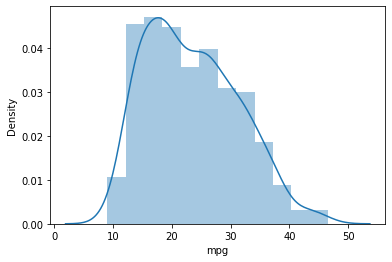

cyl


C:\Program Files\Python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Su

disp


C:\Program Files\Python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Su

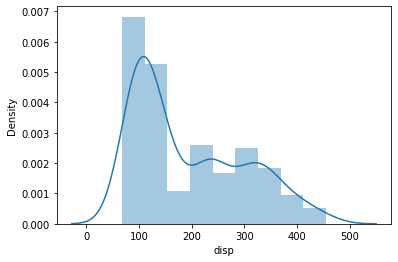

hp


C:\Program Files\Python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Su

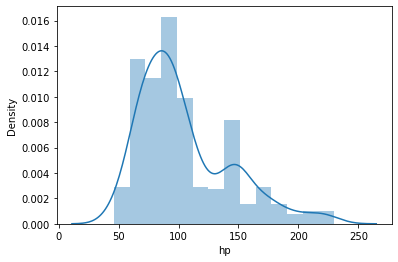

wt


C:\Program Files\Python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Su

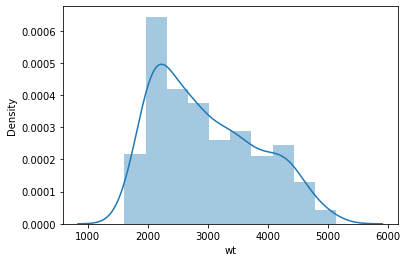

acc


C:\Program Files\Python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Su

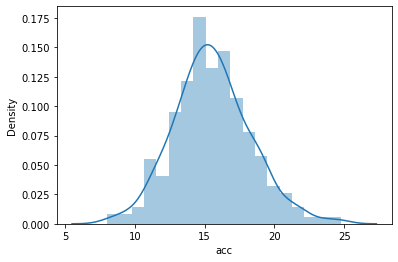

yr


C:\Program Files\Python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Su

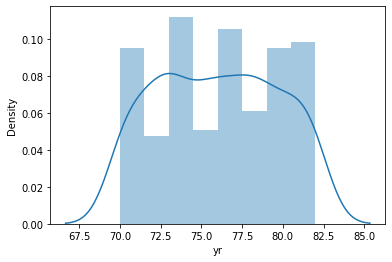

origin


C:\Program Files\Python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Su

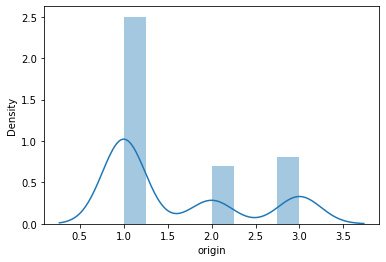

In [54]:
for col in cols:
    print(col)
    sns.distplot(combined_car_data1[col])
    plt.show()

In [55]:
data_numeric=combined_car_data1[cols]
data_numeric.skew()

mpg       0.457092
cyl       0.508109
disp      0.701669
hp        1.087326
wt        0.519586
acc       0.291587
yr        0.019688
origin    0.915185
dtype: float64

In [ ]:
From the distplot and the skewness measures, it is observed that the data present in 'hp' column is left skewed while the data in other columns are fairly evenly distributed.

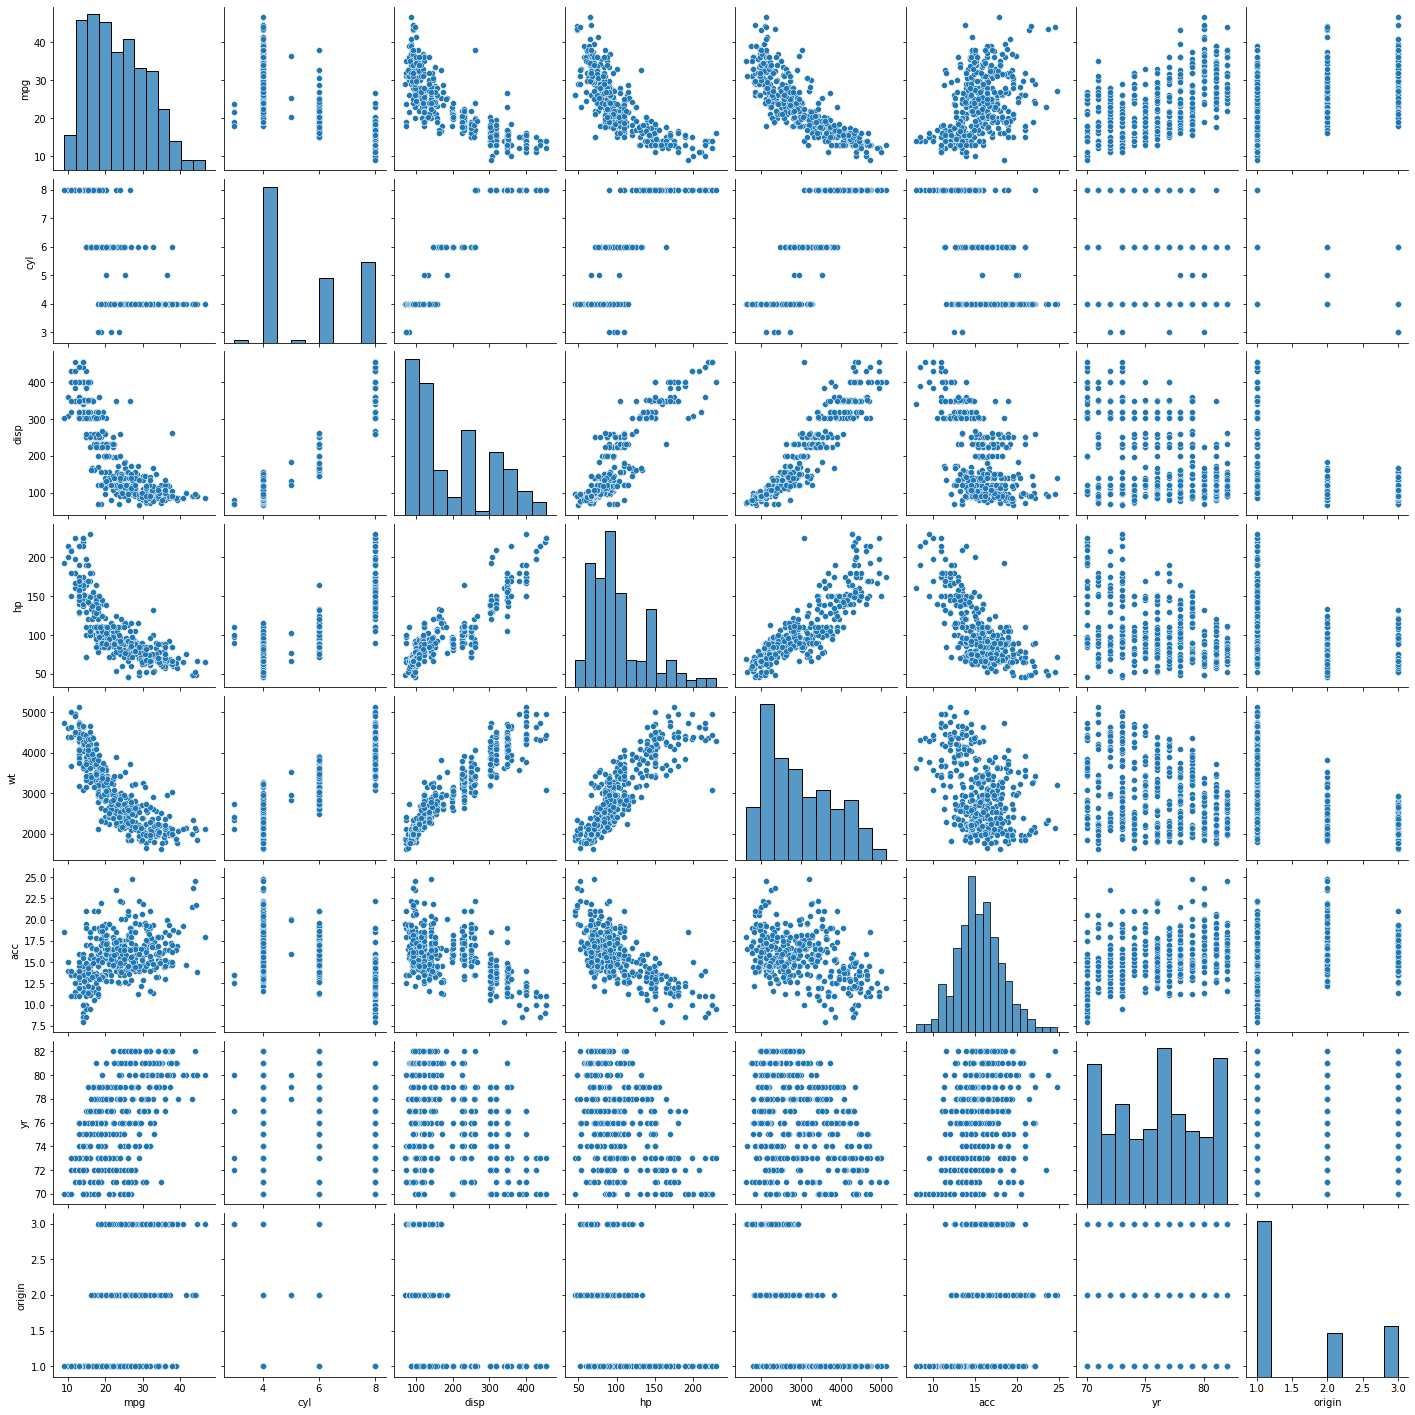

In [55]:
sns.pairplot(combined_car_data1)

In [ ]:
From the pairplots and correlation matrix,it can be seen that many features are heavily positively correlated as well as negatively correlated and thus will need to be treated before being used for clustering and regression. 

In [ ]:
Checking for the presence of outliers:

mpg


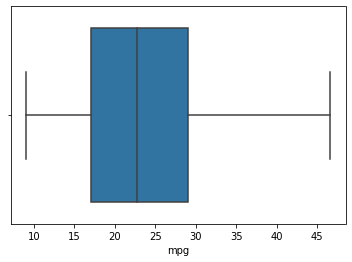

cyl


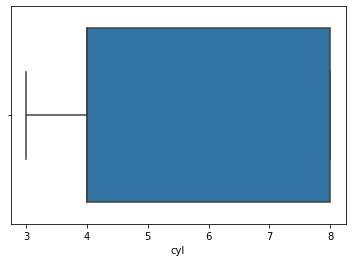

disp


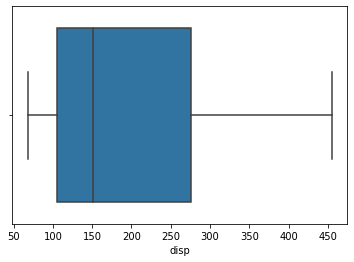

hp


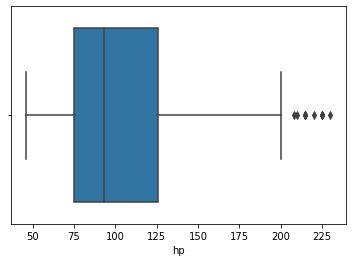

wt


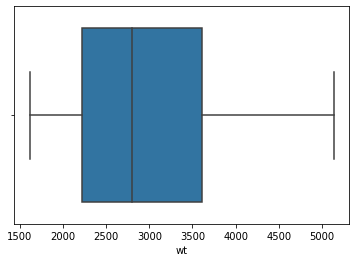

acc


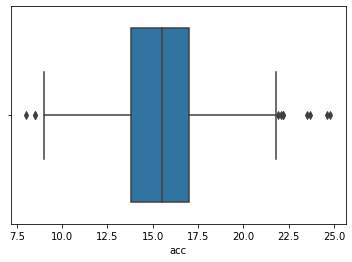

yr


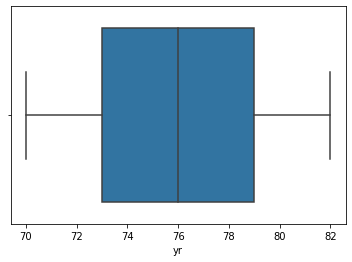

origin


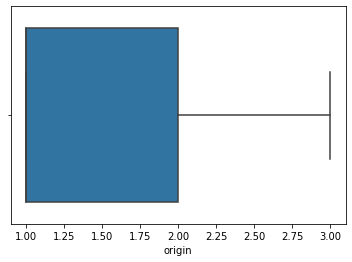

In [132]:
for col in cols:
    print(col)
    sns.boxplot(x=col,data=combined_car_data1)
    plt.show()

In [ ]:
Most of the columns do not have outliers except for 2 columns.

In [ ]:
In order to remove multicollinearity and extract the necessary features, Principal Component Analysis is performed. 
The data is first split as input data and output data.

In [70]:
y=combined_car_data1['mpg']

In [133]:
x=combined_car_data1.drop(columns=['car_name','mpg'])

In [57]:
x.head()

cyl   disp     hp    wt   acc  yr  origin
0    8  307.0  130.0  3504  12.0  70       1
1    8  350.0  165.0  3693  11.5  70       1
2    8  318.0  150.0  3436  11.0  70       1
3    8  304.0  150.0  3433  12.0  70       1
4    8  302.0  140.0  3449  10.5  70       1

In [ ]:
The input data is normalized using z-score so as to remove the skewness and scale all the features which are present in varying scales.

In [134]:
x_scaled=x.apply(zscore)

In [69]:
x_scaled.isnull().any()

cyl       False
disp      False
hp        False
wt        False
acc       False
yr        False
origin    False
dtype: bool

In [70]:
x_scaled['hp']

0      0.664133
1      1.574594
2      1.184397
3      1.184397
4      0.924265
5      2.433030
6      3.005320
7      2.875254
8      3.135386
9      2.224924
10     1.704660
11     1.444529
12     1.184397
13     3.135386
14    -0.246329
15    -0.246329
16    -0.194303
17    -0.506461
18    -0.428421
19    -1.520975
20    -0.454435
21    -0.376395
22    -0.246329
23     0.221908
24    -0.376395
25     2.875254
26     2.485056
27     2.745188
28     2.302964
29    -0.428421
30    -0.376395
31    -0.246329
33    -0.116263
34     0.013803
35    -0.116263
36    -0.428421
37    -0.116263
38     1.574594
39     1.834726
40     1.262436
41     1.184397
42     1.964792
43     1.704660
44     1.834726
45     0.143869
46    -0.844632
47    -0.116263
48    -0.428421
49    -0.480448
50    -0.376395
51    -0.896659
52    -0.740580
53    -1.026725
54    -0.922672
55    -1.156791
56    -0.896659
57    -0.246329
58    -0.636527
59    -1.312870
60    -0.376395
61    -0.480448
62     1.574594
63     1

In [ ]:
In order to understand the contribution of each component towards the variance, the cumulative explained variance plot is generated to understand the requirement of the number of components.

Text(0, 0.5, 'cumulative explained variance')

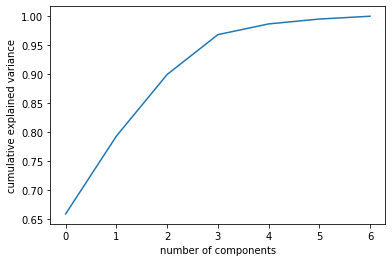

In [155]:
pca = PCA().fit(x_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
From the plot above, it can be seen that principal components 0-3 together provide 95% variance while those of 0-5 components provide nearly 99% of variance in data.


In [ ]:
In order to consider 99% variance in the data of all features, PCA is carried out for 5 components.

In [152]:
pca = PCA(5)

In [153]:
pca.fit(x_scaled)

PCA(n_components=5)

In [154]:
pca.n_components

5

In [137]:
pca_tranformed = pca.transform(x_scaled)

In [ ]:
Obtaining the transformed data from PCA:

In [138]:
pca_tranformed

array([[ 2.64350518,  0.96812086,  0.54529133, -0.41652757,  0.76567026],
       [ 3.37867684,  1.09592353,  0.27499122, -0.25855114,  0.2549771 ],
       [ 2.99229161,  1.22217302,  0.24617384, -0.55319921,  0.55460998],
       ...,
       [-0.92767651, -0.47990229, -1.63082094, -1.85348994, -0.03985562],
       [-1.63796014, -1.78689051, -0.17920697, -0.42245754, -0.43257027],
       [-1.64621718, -1.93745477, -0.02919342, -0.22361032, -0.55361133]])

In [149]:
df=pd.DataFrame(pca_tranformed)

In [150]:
df

0         1         2         3         4
0    2.643505  0.968121  0.545291 -0.416528  0.765670
1    3.378677  1.095924  0.274991 -0.258551  0.254977
2    2.992292  1.222173  0.246174 -0.553199  0.554610
3    2.821985  1.062283  0.452004 -0.384343  0.488343
4    2.869704  1.285961  0.194749 -0.700555  0.694941
5    4.589012  1.244590 -0.189755 -0.062176 -0.309546
6    5.062539  1.472298 -0.499930 -0.139014 -0.560415
7    4.977534  1.565704 -0.575814 -0.288851 -0.469472
8    5.051893  1.297825 -0.319405  0.098157 -0.707142
9    4.240837  1.634907 -0.455966 -0.628665  0.012800
10   3.674620  1.374099 -0.061517 -0.530488  0.354519
11   3.613780  1.720257 -0.411070 -0.993044  0.501575
12   3.675561  1.322687 -0.070769 -0.586835  0.625225
13   4.370101  1.617889 -0.339283 -0.430973 -0.157007
14  -1.270390  2.351010  0.544402  0.510566 -0.146973
15   0.538117  0.639511  1.461129 -0.574217  0.409441
16   0.535178  0.659996  1.450754 -0.589526  0.405224
17   0.253689  0.571703  1.604938 -0.605094  0.642661
18  -1.488671  2.486867  0.475262  0.272164  0.052911
19  -2.392855  0.709111  2.311547  0.280284  0.445031
20  -1.119463  1.172595  1.522123  0.189574 -0.363221
21  -0.897409  1.769642  0.896532 -0.475064 -0.182417
22  -1.205659  1.279399  1.481840  0.088988 -0.371893
23  -0.458590  2.237322  0.378045 -0.839407 -0.337159
24   0.445369  0.751677  1.379937 -0.757695  0.584437
25   4.190515  0.613020  0.561634  0.761542 -0.970268
26   3.560126  0.494056  0.841897  0.729070 -0.779279
27   3.886793  0.780867  0.488862  0.493540 -0.848082
28   3.270538 -0.226393  1.590479  1.512340 -0.978696
29  -1.547038  2.312230  0.276338  0.280015  0.046325
30  -0.632830  0.783112  1.319266 -1.178623 -0.207817
31  -1.294031  2.385793  0.140440  0.270127 -0.050512
32   0.852945  0.933514  0.721559 -1.055430  0.576317
33   1.019262  0.329316  1.219033 -0.253324  0.048701
34   1.014791  0.311381  1.235308 -0.274883  0.211424
35   0.864456  0.273371  1.290629 -0.324441  0.403379
36   0.915830  0.339686  1.238522 -0.318526  0.197907
37   3.529023  0.710445  0.185180  0.048899  0.014447
38   4.043610  0.722642  0.030460  0.162609 -0.134758
39   3.206698  0.415600  0.544225  0.276878  0.153767
40   3.053889  0.539774  0.462852  0.098233  0.189091
41   4.276783  0.641281  0.018143  0.346924 -0.440523
42   4.076264  0.549209  0.159315  0.353536 -0.197202
43   4.333792  0.473557  0.141947  0.525436 -0.434438
44   1.192543  0.777935  0.775922 -0.758076  0.312752
45  -1.142554  0.069495  2.115142 -0.510203 -0.149281
46   1.044883  0.410116  1.133160 -0.389148  0.252676
47   0.889507  0.487334  1.085308 -0.580239  0.514233
48  -0.616775  1.059813  1.036657 -1.523493 -0.093988
49  -1.019028  1.746635  0.589689 -0.670503 -0.025747
50  -2.026390  0.759778  1.805649  0.241531 -0.007953
51  -1.383400  1.649910  0.761235 -0.685788  0.139916
52  -2.589608  1.551570  1.296418  0.885999  0.298317
53  -2.513162  1.778609  1.072355  0.645874  0.349338
54  -2.130308  0.849087  1.743247  0.046032  0.293675
55  -1.770610 -0.041760  2.432463 -0.483320 -0.081499
56  -1.489010  1.936704  0.246612  0.584814 -0.143467
57  -1.221721  0.385600  1.478108 -1.035428 -0.144501
58  -2.529326 -0.235677  2.491478  1.061643  0.007482
59  -1.050064 -0.125948  1.934087 -0.348326 -0.449103
60  -0.942205  0.446241  1.345077 -1.034808 -0.212750
61   3.503753  0.520271 -0.012779  0.082435 -0.018844
62   3.890994  0.479388 -0.068185  0.234934 -0.130829
63   2.961356  0.268314  0.365959  0.217188  0.144539
64   3.189626  0.334438  0.243480  0.179157  0.179395
65   2.880969  0.743379 -0.043744 -0.369890  0.398919
66   4.626735  0.687570 -0.426800  0.292707 -0.637291
67   3.343952  0.166218  0.341394  0.427204 -0.027627
68   3.377441  0.195740  0.317493  0.425230 -0.084087
69   4.026544  0.438624 -0.035837  0.393859 -0.394051
70  -1.667378  2.396456 -0.143589  0.022128 -0.590725
71   2.884941  0.515792  0.162423 -0.091567  0.264646
72   2.613130  0.126860  0.562067  0.216674  0.420681
73   2.588967 -0

In [ ]:
Conducting K-Means Clustering:
    i) The optimal number of clusters to be considered is analyzed using the comparison between the number of clusters and the inertia measure obtained from fitting the data using the number of clusters in each iteration.

C:\Program Files\Python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
C:\Program Files\Python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
C:\Program Files\Python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
C:\Program Files\Python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
C:\Program Files\Python37\lib\site-packages\sklearn\cluster\_kme

Text(0, 0.5, 'Inertia')

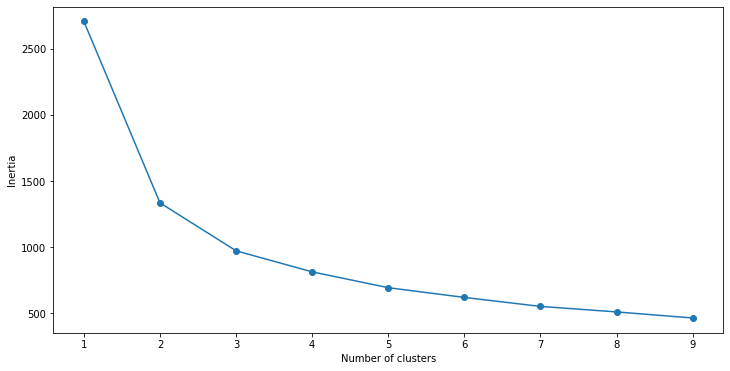

In [177]:
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
From the plot above, the elbow point is located at n=2 clusters and is considered to be the optimal value.

In [ ]:
Implementing K Means Clustering using 2 clusters:

In [155]:
kmeans = KMeans(n_jobs = -1, n_clusters = 2, init='k-means++')
cluster=kmeans.fit(df)

C:\Program Files\Python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


In [ ]:
Predicting the cluster of each sample present in the dimensionally reduced data:

In [156]:
cluster=kmeans.predict(df)

In [ ]:
Adding the predicted cluster to each sample in the dataframe:

In [157]:
df['cluster']=cluster

In [158]:
df

0         1         2         3         4  cluster
0    2.643505  0.968121  0.545291 -0.416528  0.765670        1
1    3.378677  1.095924  0.274991 -0.258551  0.254977        1
2    2.992292  1.222173  0.246174 -0.553199  0.554610        1
3    2.821985  1.062283  0.452004 -0.384343  0.488343        1
4    2.869704  1.285961  0.194749 -0.700555  0.694941        1
5    4.589012  1.244590 -0.189755 -0.062176 -0.309546        1
6    5.062539  1.472298 -0.499930 -0.139014 -0.560415        1
7    4.977534  1.565704 -0.575814 -0.288851 -0.469472        1
8    5.051893  1.297825 -0.319405  0.098157 -0.707142        1
9    4.240837  1.634907 -0.455966 -0.628665  0.012800        1
10   3.674620  1.374099 -0.061517 -0.530488  0.354519        1
11   3.613780  1.720257 -0.411070 -0.993044  0.501575        1
12   3.675561  1.322687 -0.070769 -0.586835  0.625225        1
13   4.370101  1.617889 -0.339283 -0.430973 -0.157007        1
14  -1.270390  2.351010  0.544402  0.510566 -0.146973        0
15   0.538117  0.639511  1.461129 -0.574217  0.409441        0
16   0.535178  0.659996  1.450754 -0.589526  0.405224        0
17   0.253689  0.571703  1.604938 -0.605094  0.642661        0
18  -1.488671  2.486867  0.475262  0.272164  0.052911        0
19  -2.392855  0.709111  2.311547  0.280284  0.445031        0
20  -1.119463  1.172595  1.522123  0.189574 -0.363221        0
21  -0.897409  1.769642  0.896532 -0.475064 -0.182417        0
22  -1.205659  1.279399  1.481840  0.088988 -0.371893        0
23  -0.458590  2.237322  0.378045 -0.839407 -0.337159        0
24   0.445369  0.751677  1.379937 -0.757695  0.584437        0
25   4.190515  0.613020  0.561634  0.761542 -0.970268        1
26   3.560126  0.494056  0.841897  0.729070 -0.779279        1
27   3.886793  0.780867  0.488862  0.493540 -0.848082        1
28   3.270538 -0.226393  1.590479  1.512340 -0.978696        1
29  -1.547038  2.312230  0.276338  0.280015  0.046325        0
30  -0.632830  0.783112  1.319266 -1.178623 -0.207817        0
31  -1.294031  2.385793  0.140440  0.270127 -0.050512        0
32   0.852945  0.933514  0.721559 -1.055430  0.576317        0
33   1.019262  0.329316  1.219033 -0.253324  0.048701        0
34   1.014791  0.311381  1.235308 -0.274883  0.211424        0
35   0.864456  0.273371  1.290629 -0.324441  0.403379        0
36   0.915830  0.339686  1.238522 -0.318526  0.197907        0
37   3.529023  0.710445  0.185180  0.048899  0.014447        1
38   4.043610  0.722642  0.030460  0.162609 -0.134758        1
39   3.206698  0.415600  0.544225  0.276878  0.153767        1
40   3.053889  0.539774  0.462852  0.098233  0.189091        1
41   4.276783  0.641281  0.018143  0.346924 -0.440523        1
42   4.076264  0.549209  0.159315  0.353536 -0.197202        1
43   4.333792  0.473557  0.141947  0.525436 -0.434438        1
44   1.192543  0.777935  0.775922 -0.758076  0.312752        1
45  -1.142554  0.069495  2.115142 -0.510203 -0.149281        0
46   1.044883  0.410116  1.133160 -0.389148  0.252676        0
47   0.889507  0.487334  1.085308 -0.580239  0.514233        0
48  -0.616775  1.059813  1.036657 -1.523493 -0.093988        0
49  -1.019028  1.746635  0.589689 -0.670503 -0.025747        0
50  -2.026390  0.759778  1.805649  0.241531 -0.007953        0
51  -1.383400  1.649910  0.761235 -0.685788  0.139916        0
52  -2.589608  1.551570  1.296418  0.885999  0.298317        0
53  -2.513162  1.778609  1.072355  0.645874  0.349338        0
54  -2.130308  0.849087  1.743247  0.046032  0.293675        0
55  -1.770610 -0.041760  2.432463 -0.483320 -0.081499        0
56  -1.489010  1.936704  0.246612  0.584814 -0.143467        0
57  -1.221721  0.385600  1.478108 -1.035428 -0.144501        0
58  -2.529326 -0.235677  2.491478  1.061643  0.007482        0
59  -1.050064 -0.125948  1.934087 -0.348326 -0.449103        0
60  -0.942205  0.446241  1.345077 -1.034808 -0.212750        0
61   3.503753  0.520271 -0.012779  0.082435 -0.018844        1
62   3.890994  0.479388 -0.068185  0.234934

In [108]:
df=df.drop(columns='output')

In [71]:
df1=pd.DataFrame(y)
df1['cluster']=cluster

In [72]:
df1=df1.reset_index(drop=True)

In [73]:
df1

mpg  cluster
0    18.0        1
1    15.0        1
2    18.0        1
3    16.0        1
4    17.0        1
5    15.0        1
6    14.0        1
7    14.0        1
8    14.0        1
9    15.0        1
10   15.0        1
11   14.0        1
12   15.0        1
13   14.0        1
14   24.0        0
15   22.0        0
16   18.0        0
17   21.0        0
18   27.0        0
19   26.0        0
20   25.0        0
21   24.0        0
22   25.0        0
23   26.0        0
24   21.0        0
25   10.0        1
26   10.0        1
27   11.0        1
28    9.0        1
29   27.0        0
30   28.0        0
31   25.0        0
32   19.0        0
33   16.0        0
34   17.0        0
35   19.0        0
36   18.0        0
37   14.0        1
38   14.0        1
39   14.0        1
40   14.0        1
41   12.0        1
42   13.0        1
43   13.0        1
44   18.0        1
45   22.0        0
46   19.0        0
47   18.0        0
48   23.0        0
49   28.0        0
50   30.0        0
51   30.0        0
52   31.0        0
53   35.0        0
54   27.0        0
55   26.0        0
56   24.0        0
57   25.0        0
58   23.0        0
59   20.0        0
60   21.0        0
61   13.0        1
62   14.0        1
63   15.0        1
64   14.0        1
65   17.0        1
66   11.0        1
67   13.0        1
68   12.0        1
69   13.0        1
70   19.0        0
71   15.0        1
72   13.0        1
73   13.0        1
74   14.0        1
75   18.0        0
76   22.0        0
77   21.0        0
78   26.0        0
79   22.0        0
80   28.0        0
81   23.0        0
82   28.0        0
83   27.0        0
84   13.0        1
85   14.0        1
86   13.0        1
87   14.0        1
88   15.0        1
89   12.0        1
90   13.0        1
91   13.0        1
92   14.0        1
93   13.0        1
94   12.0        1
95   13.0        1
96   18.0        0
97   16.0        0
98   18.0        0
99   18.0        0
100  23.0        0
101  26.0        0
102  11.0        1
103  12.0        1
104  13.0        1
105  12.0        1
106  18.0        0
107  20.0        0
108  21.0        0
109  22.0        0
110  18.0        0
111  19.0        0
112  21.0        0
113  26.0        0
114  15.0        1
115  16.0        1
116  29.0        0
117  24.0        0
118  20.0        0
119  19.0        0
120  15.0        1
121  24.0        0
122  20.0        0
123  11.0        1
124  20.0        0
125  19.0        0
126  15.0        0
127  31.0        0
128  26.0        0
129  32.0        0
130  25.0        0
131  16.0        0
132  16.0        0
133  18.0        0
134  16.0        1
135  13.0        1
136  14.0        1
137  14.0        1
138  14.0        1
139  29.0        0
140  26.0        0
141  26.0        0
142  31.0        0
143  32.0        0
144  28.0        0
145  24.0        0
146  26.0        0
147  24.0        0
148  26.0        0
149  31.0        0
150  19.0        0
151  18.0        0
152  15.0        0
153  15.0        0
154  16.0        1
155  15.0        1
156  16.0        1
157  14.0        1
158  17.0        0
159  16.0        0
160  15.0        0
161  18.0        0
162  21.0        0
163  20.0        1
164  13.0        1
165  29.0        0
166  23.0        0
167  20.0        0
168  23.0        0
169  24.0        0
170  25.0        0
171  24.0        0
172  18.0        0
173  29.0        0
174  19.0        0
175  23.0        0
176  23.0        0
177  22.0        0
178  25.0        0
179  33.0        0
180  28.0        0
181  25.0        0
182  25.0        0
183  26.0        0
184  27.0        0
185  17.5        1
186  16.0        1
187  15.5        1
188  14.5        1
189  22.0        0
190  22.0        0
191  24.0        0
192  22.5        0
193  29.0        0
194  24.5        0
195  29.0        0
196  33.0        0
197  20.0        0
198  18.0        0
199  18.5        0
200  17.5        0
201  29.5        0
202  32.0        0
203  28.0        0
204  26.5        0
205  20.0        0
206  13.0        1
207  19.0        0
208  19.0        0
209  16.5       

In [ ]:
Visualizing the clustered points:
    Since there are 5 columns involved which cannot be visualized at once, a scatter plot of the data present in each column is plotted along with the output, thereby yielding a total of 5 plots, rach plot containing the clustered data for that particular column.

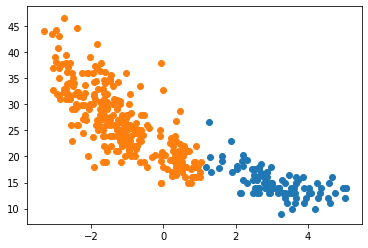

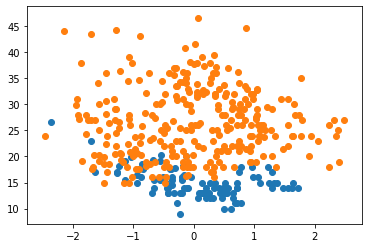

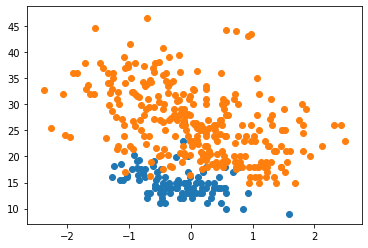

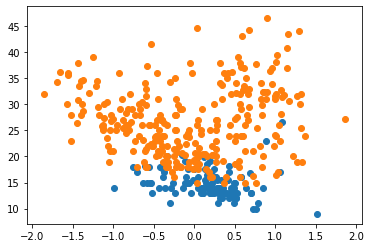

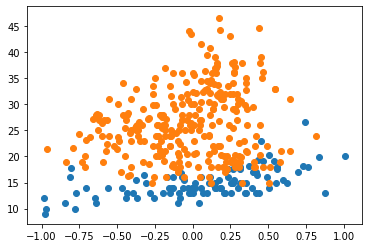

In [183]:
for i in range(0,5):
    for k in range(0,2):
        plt.scatter(df[df['cluster']==k][i],df1[df1['cluster']==k]['mpg'])
    plt.show()

In [127]:
df

0         1         2         3         4  cluster
0    2.643505  0.968121  0.545291 -0.416528  0.765670        1
1    3.378677  1.095924  0.274991 -0.258551  0.254977        1
2    2.992292  1.222173  0.246174 -0.553199  0.554610        1
3    2.821985  1.062283  0.452004 -0.384343  0.488343        1
4    2.869704  1.285961  0.194749 -0.700555  0.694941        1
5    4.589012  1.244590 -0.189755 -0.062176 -0.309546        1
6    5.062539  1.472298 -0.499930 -0.139014 -0.560415        1
7    4.977534  1.565704 -0.575814 -0.288851 -0.469472        1
8    5.051893  1.297825 -0.319405  0.098157 -0.707142        1
9    4.240837  1.634907 -0.455966 -0.628665  0.012800        1
10   3.674620  1.374099 -0.061517 -0.530488  0.354519        1
11   3.613780  1.720257 -0.411070 -0.993044  0.501575        1
12   3.675561  1.322687 -0.070769 -0.586835  0.625225        1
13   4.370101  1.617889 -0.339283 -0.430973 -0.157007        1
14  -1.270390  2.351010  0.544402  0.510566 -0.146973        0
15   0.538117  0.639511  1.461129 -0.574217  0.409441        0
16   0.535178  0.659996  1.450754 -0.589526  0.405224        0
17   0.253689  0.571703  1.604938 -0.605094  0.642661        0
18  -1.488671  2.486867  0.475262  0.272164  0.052911        0
19  -2.392855  0.709111  2.311547  0.280284  0.445031        0
20  -1.119463  1.172595  1.522123  0.189574 -0.363221        0
21  -0.897409  1.769642  0.896532 -0.475064 -0.182417        0
22  -1.205659  1.279399  1.481840  0.088988 -0.371893        0
23  -0.458590  2.237322  0.378045 -0.839407 -0.337159        0
24   0.445369  0.751677  1.379937 -0.757695  0.584437        0
25   4.190515  0.613020  0.561634  0.761542 -0.970268        1
26   3.560126  0.494056  0.841897  0.729070 -0.779279        1
27   3.886793  0.780867  0.488862  0.493540 -0.848082        1
28   3.270538 -0.226393  1.590479  1.512340 -0.978696        1
29  -1.547038  2.312230  0.276338  0.280015  0.046325        0
30  -0.632830  0.783112  1.319266 -1.178623 -0.207817        0
31  -1.294031  2.385793  0.140440  0.270127 -0.050512        0
32   0.852945  0.933514  0.721559 -1.055430  0.576317        0
33   1.019262  0.329316  1.219033 -0.253324  0.048701        0
34   1.014791  0.311381  1.235308 -0.274883  0.211424        0
35   0.864456  0.273371  1.290629 -0.324441  0.403379        0
36   0.915830  0.339686  1.238522 -0.318526  0.197907        0
37   3.529023  0.710445  0.185180  0.048899  0.014447        1
38   4.043610  0.722642  0.030460  0.162609 -0.134758        1
39   3.206698  0.415600  0.544225  0.276878  0.153767        1
40   3.053889  0.539774  0.462852  0.098233  0.189091        1
41   4.276783  0.641281  0.018143  0.346924 -0.440523        1
42   4.076264  0.549209  0.159315  0.353536 -0.197202        1
43   4.333792  0.473557  0.141947  0.525436 -0.434438        1
44   1.192543  0.777935  0.775922 -0.758076  0.312752        1
45  -1.142554  0.069495  2.115142 -0.510203 -0.149281        0
46   1.044883  0.410116  1.133160 -0.389148  0.252676        0
47   0.889507  0.487334  1.085308 -0.580239  0.514233        0
48  -0.616775  1.059813  1.036657 -1.523493 -0.093988        0
49  -1.019028  1.746635  0.589689 -0.670503 -0.025747        0
50  -2.026390  0.759778  1.805649  0.241531 -0.007953        0
51  -1.383400  1.649910  0.761235 -0.685788  0.139916        0
52  -2.589608  1.551570  1.296418  0.885999  0.298317        0
53  -2.513162  1.778609  1.072355  0.645874  0.349338        0
54  -2.130308  0.849087  1.743247  0.046032  0.293675        0
55  -1.770610 -0.041760  2.432463 -0.483320 -0.081499        0
56  -1.489010  1.936704  0.246612  0.584814 -0.143467        0
57  -1.221721  0.385600  1.478108 -1.035428 -0.144501        0
58  -2.529326 -0.235677  2.491478  1.061643  0.007482        0
59  -1.050064 -0.125948  1.934087 -0.348326 -0.449103        0
60  -0.942205  0.446241  1.345077 -1.034808 -0.212750        0
61   3.503753  0.520271 -0.012779  0.082435 -0.018844        1
62   3.890994  0.479388 -0.068185  0.234934

In [ ]:
ii)Perform clustering through hierarchical(agglomerative clustering):
    A dendogram is plotted in order to visualize the clustering at different distances. The distance measure followed for clustering is 'Average'.

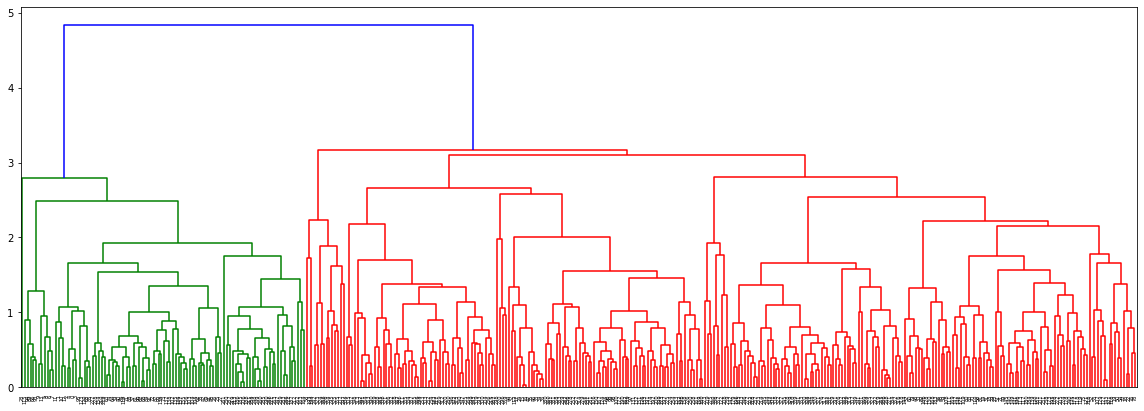

In [197]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(df, 'average')


plt.figure(figsize=(20, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [ ]:
From the dendogram above, it can be inferred that the maximum vertical distance is present between y=3.5(approximate) and at y almost equal to 5 units. Thus the optimal number of clusters can be fixed at n=2 for agglomerative clustering.
The cophenetic coefficient for the linkage carried out using 'Average' distance measure is calculated below:

In [196]:
linked = linkage(df, 'average')

c, coph_dists = cophenet(linked, pdist(df))
c

0.7897535874798153

In [ ]:
The value of c=0.789 which is almost close to 1.

In [ ]:
Implementing Agglomerative Clustering using n=2 clusters with 'average' linkage method:

In [144]:
cluster1 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')

In [145]:
df_agg=pd.DataFrame(pca_tranformed)

In [146]:
clusters=cluster1.fit(df_agg)

In [ ]:
Obtaining the clusters for each sample:

In [147]:
clusters1=cluster1.labels_
clusters1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [207]:
df_agg['cluster']=clusters1

In [208]:
df2=pd.DataFrame(y)
df2['cluster']=clusters1

In [ ]:
Visualizing the cluster points for each principal component column:

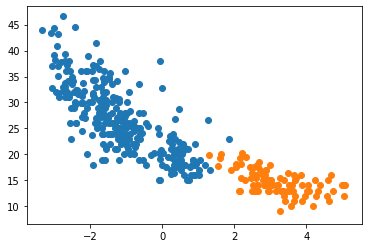

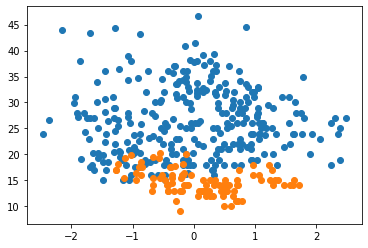

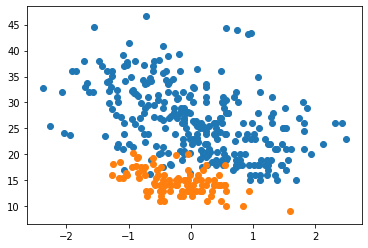

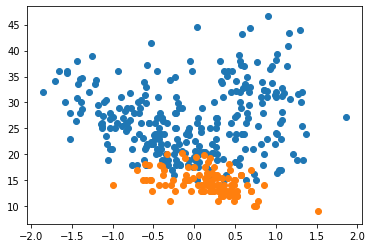

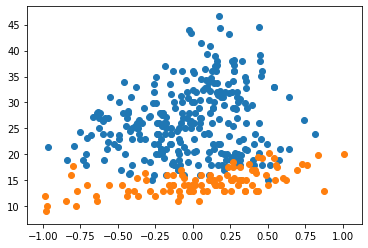

In [209]:
for i in range(0,5):
    for k in range(0,2):
        plt.scatter(df_agg[df_agg['cluster']==k][i],df2[df2['cluster']==k]['mpg'])
    plt.show()

In [128]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(df, df['cluster'])

In [129]:
silhouette_avg

0.47540196537802526

In [ ]:
Although some amount of overlap is seen between a few points belonging to both clusters, the clustering looks reasonable.
The datapoints as viewed above are closely scattered and can thus not be separated into multiple clusters. However there are points that are located far away from each other and thus due to this close spacing between the points,only 2,although still not very distinctive clusters can be obtained.

In [ ]:
Separating the input and output cluster points into different datasets as per their respective cluster:

In [74]:
df_c0=df[df['cluster']==0]
df_c1=df[df['cluster']==1]

In [75]:
df_c0

0         1         2         3         4  cluster
14  -1.270390  2.351010  0.544402  0.510566 -0.146973        0
15   0.538117  0.639511  1.461129 -0.574217  0.409441        0
16   0.535178  0.659996  1.450754 -0.589526  0.405224        0
17   0.253689  0.571703  1.604938 -0.605094  0.642661        0
18  -1.488671  2.486867  0.475262  0.272164  0.052911        0
19  -2.392855  0.709111  2.311547  0.280284  0.445031        0
20  -1.119463  1.172595  1.522123  0.189574 -0.363221        0
21  -0.897409  1.769642  0.896532 -0.475064 -0.182417        0
22  -1.205659  1.279399  1.481840  0.088988 -0.371893        0
23  -0.458590  2.237322  0.378045 -0.839407 -0.337159        0
24   0.445369  0.751677  1.379937 -0.757695  0.584437        0
29  -1.547038  2.312230  0.276338  0.280015  0.046325        0
30  -0.632830  0.783112  1.319266 -1.178623 -0.207817        0
31  -1.294031  2.385793  0.140440  0.270127 -0.050512        0
32   0.852945  0.933514  0.721559 -1.055430  0.576317        0
33   1.019262  0.329316  1.219033 -0.253324  0.048701        0
34   1.014791  0.311381  1.235308 -0.274883  0.211424        0
35   0.864456  0.273371  1.290629 -0.324441  0.403379        0
36   0.915830  0.339686  1.238522 -0.318526  0.197907        0
45  -1.142554  0.069495  2.115142 -0.510203 -0.149281        0
46   1.044883  0.410116  1.133160 -0.389148  0.252676        0
47   0.889507  0.487334  1.085308 -0.580239  0.514233        0
48  -0.616775  1.059813  1.036657 -1.523493 -0.093988        0
49  -1.019028  1.746635  0.589689 -0.670503 -0.025747        0
50  -2.026390  0.759778  1.805649  0.241531 -0.007953        0
51  -1.383400  1.649910  0.761235 -0.685788  0.139916        0
52  -2.589608  1.551570  1.296418  0.885999  0.298317        0
53  -2.513162  1.778609  1.072355  0.645874  0.349338        0
54  -2.130308  0.849087  1.743247  0.046032  0.293675        0
55  -1.770610 -0.041760  2.432463 -0.483320 -0.081499        0
56  -1.489010  1.936704  0.246612  0.584814 -0.143467        0
57  -1.221721  0.385600  1.478108 -1.035428 -0.144501        0
58  -2.529326 -0.235677  2.491478  1.061643  0.007482        0
59  -1.050064 -0.125948  1.934087 -0.348326 -0.449103        0
60  -0.942205  0.446241  1.345077 -1.034808 -0.212750        0
70  -1.667378  2.396456 -0.143589  0.022128 -0.590725        0
75  -0.446883  1.367258  0.401023 -0.167953 -0.710216        0
76  -1.449685  0.722237  1.272080  0.218467 -0.147843        0
77  -1.252593  0.389656  1.532514  0.724608 -0.573427        0
78  -1.801766  0.798970  1.305114  0.030424  0.047786        0
79  -0.802130  0.493345  1.246135 -1.063717 -0.260242        0
80  -1.749543  1.677146  0.568441  0.841729 -0.195175        0
81  -1.211739  2.057419  0.036321  0.500680 -0.211594        0
82  -0.984109  0.726003  1.072762 -1.402421 -0.071502        0
83  -1.836775  1.794763  0.482773  0.658781 -0.035705        0
96   0.632562 -0.118948  1.019368 -0.171901  0.122296        0
97   0.601971 -0.463204  1.343959  0.199128  0.109494        0
98   0.570425 -0.015101  0.937035 -0.342676  0.303716        0
99   0.496596 -0.183736  1.091513 -0.228398  0.461773        0
100  0.345145  0.011127  0.966865 -0.426916  0.338569        0
101 -2.563423  0.070210  1.817936  0.444972  0.356081        0
106  0.599040  0.197188  0.731817 -0.595708  0.411693        0
107 -2.074117  1.139838  0.793762  1.215830 -0.225545        0
108 -1.316875 -0.365608  1.818643 -0.401576 -0.181520        0
109 -1.637069  1.564358  0.257795  0.813098 -0.228796        0
110 -1.910311  2.245121 -0.313065 -0.074111 -0.407172        0
111 -1.185278 -0.102181  1.557848 -0.614233 -0.326544        0
112  0.291328  0.553060  0.508059 -1.007066  0.350433        0
113 -1.303613  1.119422  0.502127 -0.339052 -0.193450        0
116 -2.535269  0.393479  1.504580  0.090606  0.361877        0
117 -1.450745  1.070913  0.566368 -0.402504  0.106952        0
118 -0.899342  1.293405  0.194439 -0.473228 -0.245948        0
119 -0.646394  1.033157  0.404037  0.005597

In [76]:
df_c1

0         1         2         3         4  cluster
0    2.643505  0.968121  0.545291 -0.416528  0.765670        1
1    3.378677  1.095924  0.274991 -0.258551  0.254977        1
2    2.992292  1.222173  0.246174 -0.553199  0.554610        1
3    2.821985  1.062283  0.452004 -0.384343  0.488343        1
4    2.869704  1.285961  0.194749 -0.700555  0.694941        1
5    4.589012  1.244590 -0.189755 -0.062176 -0.309546        1
6    5.062539  1.472298 -0.499930 -0.139014 -0.560415        1
7    4.977534  1.565704 -0.575814 -0.288851 -0.469472        1
8    5.051893  1.297825 -0.319405  0.098157 -0.707142        1
9    4.240837  1.634907 -0.455966 -0.628665  0.012800        1
10   3.674620  1.374099 -0.061517 -0.530488  0.354519        1
11   3.613780  1.720257 -0.411070 -0.993044  0.501575        1
12   3.675561  1.322687 -0.070769 -0.586835  0.625225        1
13   4.370101  1.617889 -0.339283 -0.430973 -0.157007        1
25   4.190515  0.613020  0.561634  0.761542 -0.970268        1
26   3.560126  0.494056  0.841897  0.729070 -0.779279        1
27   3.886793  0.780867  0.488862  0.493540 -0.848082        1
28   3.270538 -0.226393  1.590479  1.512340 -0.978696        1
37   3.529023  0.710445  0.185180  0.048899  0.014447        1
38   4.043610  0.722642  0.030460  0.162609 -0.134758        1
39   3.206698  0.415600  0.544225  0.276878  0.153767        1
40   3.053889  0.539774  0.462852  0.098233  0.189091        1
41   4.276783  0.641281  0.018143  0.346924 -0.440523        1
42   4.076264  0.549209  0.159315  0.353536 -0.197202        1
43   4.333792  0.473557  0.141947  0.525436 -0.434438        1
44   1.192543  0.777935  0.775922 -0.758076  0.312752        1
61   3.503753  0.520271 -0.012779  0.082435 -0.018844        1
62   3.890994  0.479388 -0.068185  0.234934 -0.130829        1
63   2.961356  0.268314  0.365959  0.217188  0.144539        1
64   3.189626  0.334438  0.243480  0.179157  0.179395        1
65   2.880969  0.743379 -0.043744 -0.369890  0.398919        1
66   4.626735  0.687570 -0.426800  0.292707 -0.637291        1
67   3.343952  0.166218  0.341394  0.427204 -0.027627        1
68   3.377441  0.195740  0.317493  0.425230 -0.084087        1
69   4.026544  0.438624 -0.035837  0.393859 -0.394051        1
71   2.884941  0.515792  0.162423 -0.091567  0.264646        1
72   2.613130  0.126860  0.562067  0.216674  0.420681        1
73   2.588967 -0.227797  0.925407  0.701683  0.093232        1
74   2.877800  0.194677  0.466549  0.289961  0.146426        1
84   3.362565  0.249277 -0.057818  0.245319 -0.148545        1
85   2.822603  0.568741 -0.242667 -0.362039  0.392332        1
86   2.964069  0.164890  0.079824  0.103838  0.349627        1
87   2.530211 -0.090814  0.432321  0.313151  0.301224        1
88   2.828751  0.354250 -0.041180 -0.107817  0.328923        1
89   4.562950  0.312128 -0.473101  0.489902 -0.646164        1
90   3.588296  0.193234 -0.149847  0.192983  0.206924        1
91   3.307318  0.122394  0.024814  0.295680  0.001309        1
92   2.846879 -0.105705  0.371452  0.456731  0.052161        1
93   4.747698  0.503180 -0.659049  0.380320 -0.772733        1
94   5.036574  0.473181 -0.705463  0.520953 -0.986895        1
95   3.479978  0.655687 -0.469887 -0.232458  0.070720        1
102  3.643594 -0.284170  0.263869  0.786379 -0.099830        1
103  3.952829  0.063072 -0.120774  0.518434 -0.252838        1
104  3.631119  0.088046 -0.028500  0.463284 -0.283931        1
105  3.676662  0.259930 -0.176563  0.323503 -0.365893        1
114  3.011931  0.142421  0.081220  0.140983  0.311007        1
115  4.674289  0.971620 -1.031343 -0.099720 -0.812695        1
120  2.798352  0.707104 -0.351145 -0.544269  0.550053        1
123  3.413568  0.722023 -0.493312 -0.293541  0.042997        1
134  2.610424 -0.190500  0.119486  0.274152  0.230689        1
135  3.162569 -0.423674  0.172592  0.695935 -0.090263        1
136  3.008579 -0.157930 -0.027106  0.360133 -0.000929        1
137  2.647391 -0.659300  0.532668  0.853322

In [77]:
y_c0=df1[df1['cluster']==0]['mpg']
y_c1=df1[df1['cluster']==1]['mpg']

In [78]:
y_c0

14     24.0
15     22.0
16     18.0
17     21.0
18     27.0
19     26.0
20     25.0
21     24.0
22     25.0
23     26.0
24     21.0
29     27.0
30     28.0
31     25.0
32     19.0
33     16.0
34     17.0
35     19.0
36     18.0
45     22.0
46     19.0
47     18.0
48     23.0
49     28.0
50     30.0
51     30.0
52     31.0
53     35.0
54     27.0
55     26.0
56     24.0
57     25.0
58     23.0
59     20.0
60     21.0
70     19.0
75     18.0
76     22.0
77     21.0
78     26.0
79     22.0
80     28.0
81     23.0
82     28.0
83     27.0
96     18.0
97     16.0
98     18.0
99     18.0
100    23.0
101    26.0
106    18.0
107    20.0
108    21.0
109    22.0
110    18.0
111    19.0
112    21.0
113    26.0
116    29.0
117    24.0
118    20.0
119    19.0
121    24.0
122    20.0
124    20.0
125    19.0
126    15.0
127    31.0
128    26.0
129    32.0
130    25.0
131    16.0
132    16.0
133    18.0
139    29.0
140    26.0
141    26.0
142    31.0
143    32.0
144    28.0
145    24.0
146    26.0
147 

In [246]:
y_c1

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
5      15.0
6      14.0
7      14.0
8      14.0
9      15.0
10     15.0
11     14.0
12     15.0
13     14.0
25     10.0
26     10.0
27     11.0
28      9.0
37     14.0
38     14.0
39     14.0
40     14.0
41     12.0
42     13.0
43     13.0
44     18.0
61     13.0
62     14.0
63     15.0
64     14.0
65     17.0
66     11.0
67     13.0
68     12.0
69     13.0
71     15.0
72     13.0
73     13.0
74     14.0
84     13.0
85     14.0
86     13.0
87     14.0
88     15.0
89     12.0
90     13.0
91     13.0
92     14.0
93     13.0
94     12.0
95     13.0
102    11.0
103    12.0
104    13.0
105    12.0
114    15.0
115    16.0
120    15.0
123    11.0
134    16.0
135    13.0
136    14.0
137    14.0
138    14.0
154    16.0
155    15.0
156    16.0
157    14.0
163    20.0
164    13.0
185    17.5
186    16.0
187    15.5
188    14.5
206    13.0
210    16.5
211    13.0
212    13.0
213    13.0
219    17.5
220    17.0
221    15.5
222    15.0
227 

In [ ]:
Training regression model for entire data without clustering:

In [286]:
df_2=df.drop(columns='cluster')

In [287]:
x_train, x_test, y_train, y_test = train_test_split(df_2, y, test_size = 0.2, random_state=42)
model = LinearRegression().fit(x_train, y_train)
y_pred=model.predict(x_test)

In [288]:
r2 = r2_score(y_test, y_pred)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))


In [289]:
r2

0.7493558424511211

In [290]:
rmse

3.5767337036686833

In [ ]:
An r2 score of 0.749 and rmse of 3.576 is obtained.

In [79]:

df_c0=df_c0.drop(columns='cluster')
df_c1=df_c1.drop(columns='cluster')

In [ ]:
Training on datasets of indivual clusters separately:
    i) Training on datapoints belonging to cluster 0:

In [81]:
x_train, x_test, y_train, y_test = train_test_split(df_c0, y_c0, test_size = 0.2, random_state=42)
model = LinearRegression().fit(x_train, y_train)
y_pred=model.predict(x_test)
r2 = r2_score(y_test, y_pred)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(r2)
print(rmse)

0.7308243842490736
3.6220277471690103


In [82]:
model.coef_

array([-4.73203769, -1.21236424, -1.92189332, -1.62293138,  4.14805848])

In [ ]:
An r2 score of 0.7308 is obtained.
The rmse is 3.622.
The coefficients are [-4.73203769, -1.21236424, -1.92189332, -1.62293138,  4.14805848].

In [ ]:
ii) Training on data points belonging to cluster 1:

In [83]:
x_train, x_test, y_train, y_test = train_test_split(df_c1, y_c1, test_size = 0.2, random_state=42)
model = LinearRegression().fit(x_train, y_train)
y_pred=model.predict(x_test)

In [84]:
r2 = r2_score(y_test, y_pred)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))


In [85]:
r2

0.5736128002173246

In [86]:
rmse

1.4661483358895906

In [87]:
model.coef_

array([ 0.26494461, -2.93281178,  0.03569613, -3.69079397,  0.88236699])

In [ ]:
An r2 score of 0.573 is obtained.
The rmse is 1.466 which is low.
Thus it can be inferred that training on indivual cluster datasets can help reduce rmse or improve r2 score and can help in better regression training,

In [ ]:
Improvements:
    i)The number of datapoints can be increased. Due to presence of less number of datapoints, the outliers cannot be removed, the removal of which may significantly impact the performance of the model.
    ii) The variance of the datapoints is found to be less as a result of which the points are closely spaced and can make interpretation of the various features more difficult, even with the help of clustering.
    iii) Due to lesser variations in the data, the model can be prone to overfitting as well.

# Part 2

In [ ]:
Reading the xlsx file:

In [388]:
part2_data=pd.read_excel('Part2 - Company.xlsx',engine='openpyxl')

In [389]:
part2_data

A    B    C    D    Quality
0    47   27   45  108  Quality A
1   174  133  134  166  Quality B
2   159  163  135  131        NaN
3    61   23    3   44  Quality A
4    59   60    9   68  Quality A
5   153  140  154  199        NaN
6    34   28   78   22  Quality A
7   191  144  143  154        NaN
8   160  181  194  178  Quality B
9   145  178  158  141        NaN
10   76   94  107   37  Quality A
11  138  200  153  192  Quality B
12   27  106   57   37  Quality A
13   45   76   56   57  Quality A
14  186  142  146  174        NaN
15  196  145  166  132  Quality B
16    4   61   72   98  Quality A
17   96  109   75   34  Quality A
18  167  171  163  191        NaN
19  196  178  165  177  Quality B
20  159  181  142  166  Quality B
21    5  100   32  110  Quality A
22    3   63  109   67  Quality A
23  171  185  181  183        NaN
24  101  104   95   49  Quality A
25  103   74   59   17  Quality A
26  170  153  181  176  Quality B
27  193  169  199  155        NaN
28   85   58   44   32  Quality A
29   29   49    6   35        NaN
30  135  163  194  168  Quality B
31  142  159  176  150  Quality B
32  161  138  143  139        NaN
33  170  174  190  181  Quality B
34  183  142  164  186  Quality B
35  181  147  174  130        NaN
36  185  168  160  151  Quality B
37  132  157  174  138  Quality B
38   44  104    8   21  Quality A
39  102    5   59   72  Quality A
40  179  143  189  177        NaN
41   73   22   83   31  Quality A
42   48   68   98   51  Quality A
43  169  184  200  133  Quality B
44   22    9   25   76  Quality A
45   44   90    6    8  Quality A
46  197  173  165  197        NaN
47   28   91   17   17  Quality A
48  197  161  182  198  Quality B
49  136  199  189  141  Quality B
50   47   44   66   41  Quality A
51  110   33   76    3  Quality A
52  188  178  175  162        NaN
53   91   13   14   88  Quality A
54   70   96   70  103  Quality A
55  103   60   15   56  Quality A
56  200  186  185  179  Quality B
57  137  182  165  199        NaN
58   88   39    9  102        NaN
59  180  157  192  198        NaN
60  157  135  135  156        NaN

In [ ]:
i)In order to impute the missing data, KNN Imputation is followed. In this method, the missing classes are predicted using the distance of the point from the neighboring observations and their corresponding classes.
ii)Before performing imputation, the classes Quality A and B are ordinally encoded as 0 and 1. 

In [394]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

In [395]:
encoder = OrdinalEncoder()
cat_data=part2_data['Quality']
nonulls = np.array(cat_data.dropna())
impute_reshape = nonulls.reshape(-1,1)
impute_ordinal = encoder.fit_transform(impute_reshape)
cat_data.loc[cat_data.notnull()] = np.squeeze(impute_ordinal)

C:\Program Files\Python37\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [396]:
cat_data

0       0
1       1
2     NaN
3       0
4       0
5     NaN
6       0
7     NaN
8       1
9     NaN
10      0
11      1
12      0
13      0
14    NaN
15      1
16      0
17      0
18    NaN
19      1
20      1
21      0
22      0
23    NaN
24      0
25      0
26      1
27    NaN
28      0
29    NaN
30      1
31      1
32    NaN
33      1
34      1
35    NaN
36      1
37      1
38      0
39      0
40    NaN
41      0
42      0
43      1
44      0
45      0
46    NaN
47      0
48      1
49      1
50      0
51      0
52    NaN
53      0
54      0
55      0
56      1
57    NaN
58    NaN
59    NaN
60    NaN
Name: Quality, dtype: object

In [398]:
part2_data1=part2_data
part2_data1['Quality']=cat_data

In [399]:
part2_data

A    B    C    D Quality
0    47   27   45  108       0
1   174  133  134  166       1
2   159  163  135  131     NaN
3    61   23    3   44       0
4    59   60    9   68       0
5   153  140  154  199     NaN
6    34   28   78   22       0
7   191  144  143  154     NaN
8   160  181  194  178       1
9   145  178  158  141     NaN
10   76   94  107   37       0
11  138  200  153  192       1
12   27  106   57   37       0
13   45   76   56   57       0
14  186  142  146  174     NaN
15  196  145  166  132       1
16    4   61   72   98       0
17   96  109   75   34       0
18  167  171  163  191     NaN
19  196  178  165  177       1
20  159  181  142  166       1
21    5  100   32  110       0
22    3   63  109   67       0
23  171  185  181  183     NaN
24  101  104   95   49       0
25  103   74   59   17       0
26  170  153  181  176       1
27  193  169  199  155     NaN
28   85   58   44   32       0
29   29   49    6   35     NaN
30  135  163  194  168       1
31  142  159  176  150       1
32  161  138  143  139     NaN
33  170  174  190  181       1
34  183  142  164  186       1
35  181  147  174  130     NaN
36  185  168  160  151       1
37  132  157  174  138       1
38   44  104    8   21       0
39  102    5   59   72       0
40  179  143  189  177     NaN
41   73   22   83   31       0
42   48   68   98   51       0
43  169  184  200  133       1
44   22    9   25   76       0
45   44   90    6    8       0
46  197  173  165  197     NaN
47   28   91   17   17       0
48  197  161  182  198       1
49  136  199  189  141       1
50   47   44   66   41       0
51  110   33   76    3       0
52  188  178  175  162     NaN
53   91   13   14   88       0
54   70   96   70  103       0
55  103   60   15   56       0
56  200  186  185  179       1
57  137  182  165  199     NaN
58   88   39    9  102     NaN
59  180  157  192  198     NaN
60  157  135  135  156     NaN

In [ ]:
Performing the imputation after encoding:

In [402]:
imputer=KNNImputer()
df_complete=pd.DataFrame(imputer.fit_transform(part2_data),columns=part2_data.columns)

In [ ]:
Assigning the imputed encoded classes back to the dataset and obtaining the corresponding labels:

In [403]:
df_complete

A      B      C      D  Quality
0    47.0   27.0   45.0  108.0      0.0
1   174.0  133.0  134.0  166.0      1.0
2   159.0  163.0  135.0  131.0      1.0
3    61.0   23.0    3.0   44.0      0.0
4    59.0   60.0    9.0   68.0      0.0
5   153.0  140.0  154.0  199.0      1.0
6    34.0   28.0   78.0   22.0      0.0
7   191.0  144.0  143.0  154.0      1.0
8   160.0  181.0  194.0  178.0      1.0
9   145.0  178.0  158.0  141.0      1.0
10   76.0   94.0  107.0   37.0      0.0
11  138.0  200.0  153.0  192.0      1.0
12   27.0  106.0   57.0   37.0      0.0
13   45.0   76.0   56.0   57.0      0.0
14  186.0  142.0  146.0  174.0      1.0
15  196.0  145.0  166.0  132.0      1.0
16    4.0   61.0   72.0   98.0      0.0
17   96.0  109.0   75.0   34.0      0.0
18  167.0  171.0  163.0  191.0      1.0
19  196.0  178.0  165.0  177.0      1.0
20  159.0  181.0  142.0  166.0      1.0
21    5.0  100.0   32.0  110.0      0.0
22    3.0   63.0  109.0   67.0      0.0
23  171.0  185.0  181.0  183.0      1.0
24  101.0  104.0   95.0   49.0      0.0
25  103.0   74.0   59.0   17.0      0.0
26  170.0  153.0  181.0  176.0      1.0
27  193.0  169.0  199.0  155.0      1.0
28   85.0   58.0   44.0   32.0      0.0
29   29.0   49.0    6.0   35.0      0.0
30  135.0  163.0  194.0  168.0      1.0
31  142.0  159.0  176.0  150.0      1.0
32  161.0  138.0  143.0  139.0      1.0
33  170.0  174.0  190.0  181.0      1.0
34  183.0  142.0  164.0  186.0      1.0
35  181.0  147.0  174.0  130.0      1.0
36  185.0  168.0  160.0  151.0      1.0
37  132.0  157.0  174.0  138.0      1.0
38   44.0  104.0    8.0   21.0      0.0
39  102.0    5.0   59.0   72.0      0.0
40  179.0  143.0  189.0  177.0      1.0
41   73.0   22.0   83.0   31.0      0.0
42   48.0   68.0   98.0   51.0      0.0
43  169.0  184.0  200.0  133.0      1.0
44   22.0    9.0   25.0   76.0      0.0
45   44.0   90.0    6.0    8.0      0.0
46  197.0  173.0  165.0  197.0      1.0
47   28.0   91.0   17.0   17.0      0.0
48  197.0  161.0  182.0  198.0      1.0
49  136.0  199.0  189.0  141.0      1.0
50   47.0   44.0   66.0   41.0      0.0
51  110.0   33.0   76.0    3.0      0.0
52  188.0  178.0  175.0  162.0      1.0
53   91.0   13.0   14.0   88.0      0.0
54   70.0   96.0   70.0  103.0      0.0
55  103.0   60.0   15.0   56.0      0.0
56  200.0  186.0  185.0  179.0      1.0
57  137.0  182.0  165.0  199.0      1.0
58   88.0   39.0    9.0  102.0      0.0
59  180.0  157.0  192.0  198.0      1.0
60  157.0  135.0  135.0  156.0      1.0

In [406]:
df_complete['Quality']=encoder.inverse_transform(np.array(df_complete['Quality']).reshape(-1,1))

In [408]:
df_complete

A      B      C      D    Quality
0    47.0   27.0   45.0  108.0  Quality A
1   174.0  133.0  134.0  166.0  Quality B
2   159.0  163.0  135.0  131.0  Quality B
3    61.0   23.0    3.0   44.0  Quality A
4    59.0   60.0    9.0   68.0  Quality A
5   153.0  140.0  154.0  199.0  Quality B
6    34.0   28.0   78.0   22.0  Quality A
7   191.0  144.0  143.0  154.0  Quality B
8   160.0  181.0  194.0  178.0  Quality B
9   145.0  178.0  158.0  141.0  Quality B
10   76.0   94.0  107.0   37.0  Quality A
11  138.0  200.0  153.0  192.0  Quality B
12   27.0  106.0   57.0   37.0  Quality A
13   45.0   76.0   56.0   57.0  Quality A
14  186.0  142.0  146.0  174.0  Quality B
15  196.0  145.0  166.0  132.0  Quality B
16    4.0   61.0   72.0   98.0  Quality A
17   96.0  109.0   75.0   34.0  Quality A
18  167.0  171.0  163.0  191.0  Quality B
19  196.0  178.0  165.0  177.0  Quality B
20  159.0  181.0  142.0  166.0  Quality B
21    5.0  100.0   32.0  110.0  Quality A
22    3.0   63.0  109.0   67.0  Quality A
23  171.0  185.0  181.0  183.0  Quality B
24  101.0  104.0   95.0   49.0  Quality A
25  103.0   74.0   59.0   17.0  Quality A
26  170.0  153.0  181.0  176.0  Quality B
27  193.0  169.0  199.0  155.0  Quality B
28   85.0   58.0   44.0   32.0  Quality A
29   29.0   49.0    6.0   35.0  Quality A
30  135.0  163.0  194.0  168.0  Quality B
31  142.0  159.0  176.0  150.0  Quality B
32  161.0  138.0  143.0  139.0  Quality B
33  170.0  174.0  190.0  181.0  Quality B
34  183.0  142.0  164.0  186.0  Quality B
35  181.0  147.0  174.0  130.0  Quality B
36  185.0  168.0  160.0  151.0  Quality B
37  132.0  157.0  174.0  138.0  Quality B
38   44.0  104.0    8.0   21.0  Quality A
39  102.0    5.0   59.0   72.0  Quality A
40  179.0  143.0  189.0  177.0  Quality B
41   73.0   22.0   83.0   31.0  Quality A
42   48.0   68.0   98.0   51.0  Quality A
43  169.0  184.0  200.0  133.0  Quality B
44   22.0    9.0   25.0   76.0  Quality A
45   44.0   90.0    6.0    8.0  Quality A
46  197.0  173.0  165.0  197.0  Quality B
47   28.0   91.0   17.0   17.0  Quality A
48  197.0  161.0  182.0  198.0  Quality B
49  136.0  199.0  189.0  141.0  Quality B
50   47.0   44.0   66.0   41.0  Quality A
51  110.0   33.0   76.0    3.0  Quality A
52  188.0  178.0  175.0  162.0  Quality B
53   91.0   13.0   14.0   88.0  Quality A
54   70.0   96.0   70.0  103.0  Quality A
55  103.0   60.0   15.0   56.0  Quality A
56  200.0  186.0  185.0  179.0  Quality B
57  137.0  182.0  165.0  199.0  Quality B
58   88.0   39.0    9.0  102.0  Quality A
59  180.0  157.0  192.0  198.0  Quality B
60  157.0  135.0  135.0  156.0  Quality B

# Part 3

In [ ]:
Importing the dataset:

In [88]:
data=pd.read_csv('Part3 - vehicle.csv')

In [319]:
data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [ ]:
Checking the shape of the dataset and types of data present in each column:

In [320]:
data.shape

(846, 19)

In [321]:
data.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [ ]:
Checking the presence of Null Values:

In [326]:
data.isnull().any()

compactness                    False
circularity                     True
distance_circularity            True
radius_ratio                    True
pr.axis_aspect_ratio            True
max.length_aspect_ratio        False
scatter_ratio                   True
elongatedness                   True
pr.axis_rectangularity          True
max.length_rectangularity      False
scaled_variance                 True
scaled_variance.1               True
scaled_radius_of_gyration       True
scaled_radius_of_gyration.1     True
skewness_about                  True
skewness_about.1                True
skewness_about.2                True
hollows_ratio                  False
class                          False
dtype: bool

In [ ]:
From the output above, it can be observed that null values are present in several columns. 

In [ ]:
Removing the null values:

In [89]:
data1=data.dropna(axis=0,how='any')

In [90]:
data1.isnull().any()

compactness                    False
circularity                    False
distance_circularity           False
radius_ratio                   False
pr.axis_aspect_ratio           False
max.length_aspect_ratio        False
scatter_ratio                  False
elongatedness                  False
pr.axis_rectangularity         False
max.length_rectangularity      False
scaled_variance                False
scaled_variance.1              False
scaled_radius_of_gyration      False
scaled_radius_of_gyration.1    False
skewness_about                 False
skewness_about.1               False
skewness_about.2               False
hollows_ratio                  False
class                          False
dtype: bool

In [ ]:
Shape of data after the removal of null values:

In [92]:
data1.shape

(813, 19)

In [91]:
data1.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   813.000000   813.000000             813.00000    813.000000   
mean     93.656827    44.803198              82.04305    169.098401   
std       8.233751     6.146659              15.78307     33.615402   
min      73.000000    33.000000              40.00000    104.000000   
25%      87.000000    40.000000              70.00000    141.000000   
50%      93.000000    44.000000              79.00000    167.000000   
75%     100.000000    49.000000              98.00000    195.000000   
max     119.000000    59.000000             112.00000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            813.000000               813.000000     813.000000   
mean              61.774908                 8.599016     168.563346   
std                7.973000                 4.677174      33.082186   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     146.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count      813.00000              813.000000                 813.000000   
mean        40.98893               20.558426                 147.891759   
std          7.80338                2.573184                  14.504648   
min         26.00000               17.000000                 118.000000   
25%         33.00000               19.000000                 137.000000   
50%         43.00000               20.000000                 146.000000   
75%         46.00000               23.000000                 159.000000   
max         61.00000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       813.000000         813.000000                 813.000000   
mean        188.377614         438.382534                 174.252153   
std          31.165873         175.270368                  32.332161   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         364.000000                 173.000000   
75%         217.000000         586.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   813.000000      813.000000        813.000000   
mean                     72.399754        6.351784         12.687577   
std                       7.475994        4.921476          8.926951   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          6.000000   
50%                      71.000000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        813.000000     813.000000  
mean         188.979090     195.729397  
std            6.153681       7.398781  
min          176.000000     181.000000  
25%          184.000000     191.000000  
50%          189.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

In [93]:
data_numeric=data1[list(data1.describe().columns)]
data_numeric.skew()                 

compactness                    0.386048
circularity                    0.272723
distance_circularity           0.114244
radius_ratio                   0.396129
pr.axis_aspect_ratio           3.832899
max.length_aspect_ratio        6.698420
scatter_ratio                  0.596913
elongatedness                  0.053941
pr.axis_rectangularity         0.759483
max.length_rectangularity      0.271183
scaled_variance                0.629144
scaled_variance.1              0.822734
scaled_radius_of_gyration      0.266943
scaled_radius_of_gyration.1    2.156717
skewness_about                 0.782756
skewness_about.1               0.671462
skewness_about.2               0.255880
hollows_ratio                 -0.229941
dtype: float64

compactness


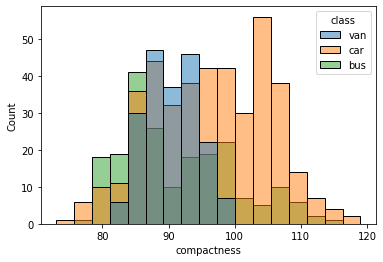

circularity


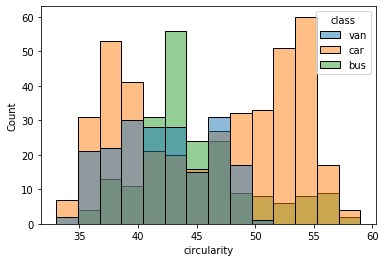

distance_circularity


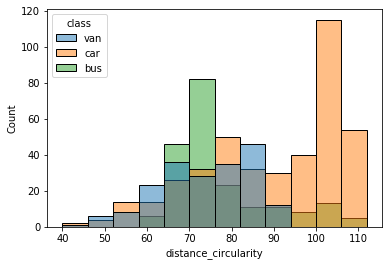

radius_ratio


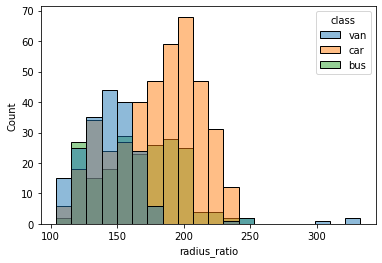

pr.axis_aspect_ratio


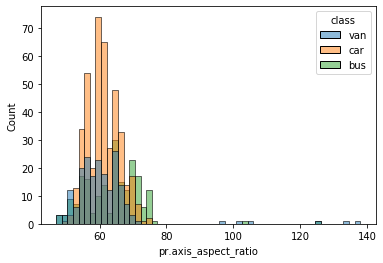

max.length_aspect_ratio


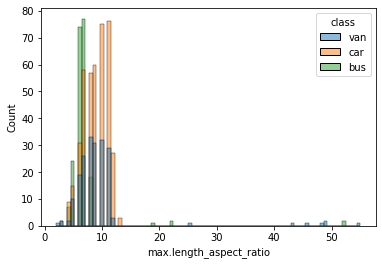

scatter_ratio


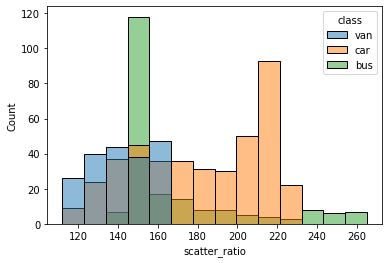

elongatedness


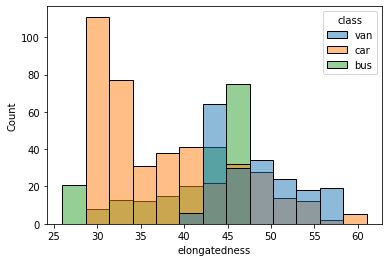

pr.axis_rectangularity


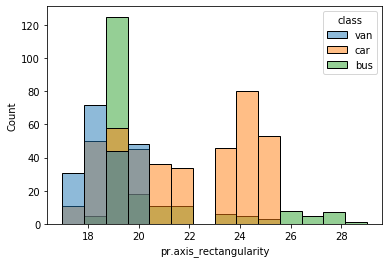

max.length_rectangularity


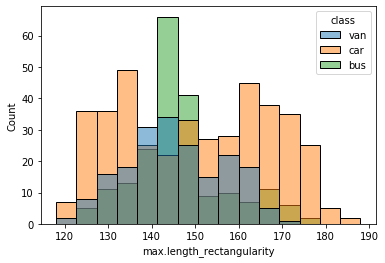

scaled_variance


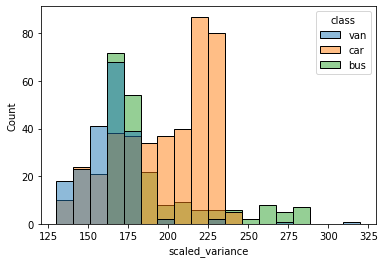

scaled_variance.1


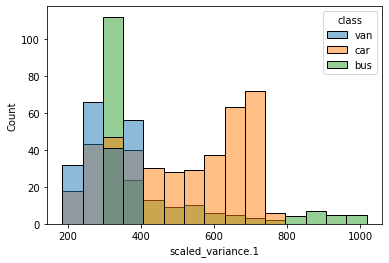

scaled_radius_of_gyration


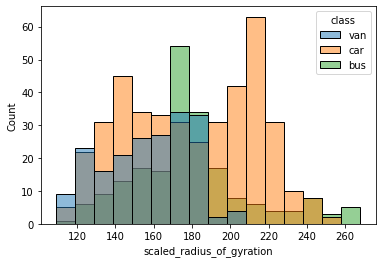

scaled_radius_of_gyration.1


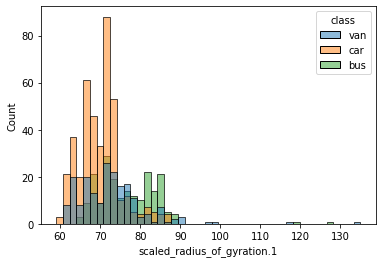

skewness_about


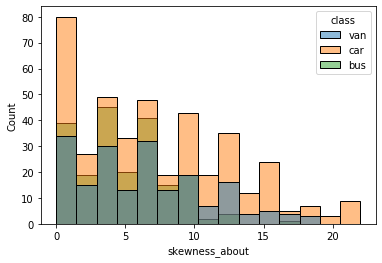

skewness_about.1


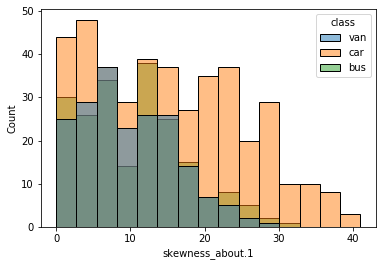

skewness_about.2


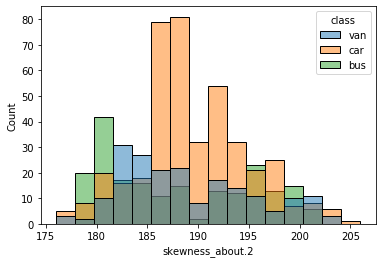

hollows_ratio


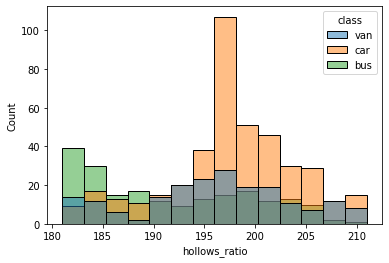

In [96]:
cols=list(data1.describe().columns)
for col in cols:
    print(col)
    sns.histplot(data=data1,x=col,hue='class')
    plt.show()

In [ ]:
i)The distribution of most of column data is fairly uniformly distributed.
ii)The data present in pr.axis_aspect_ratio, max.length_aspect_ratio and scaled_radius_of_gyration.1 are heavily left skewed.

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


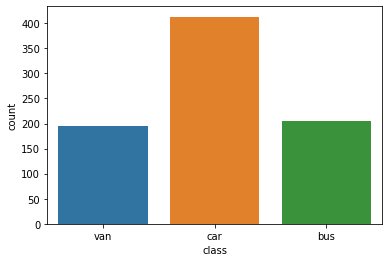

In [97]:
sns.countplot(data1['class'])

In [ ]:
The number of cars present in the dataset is the highest while the number of van and bus classes are almost equal.

In [ ]:
Obtaining the pairplot and observing the relation between different columns:

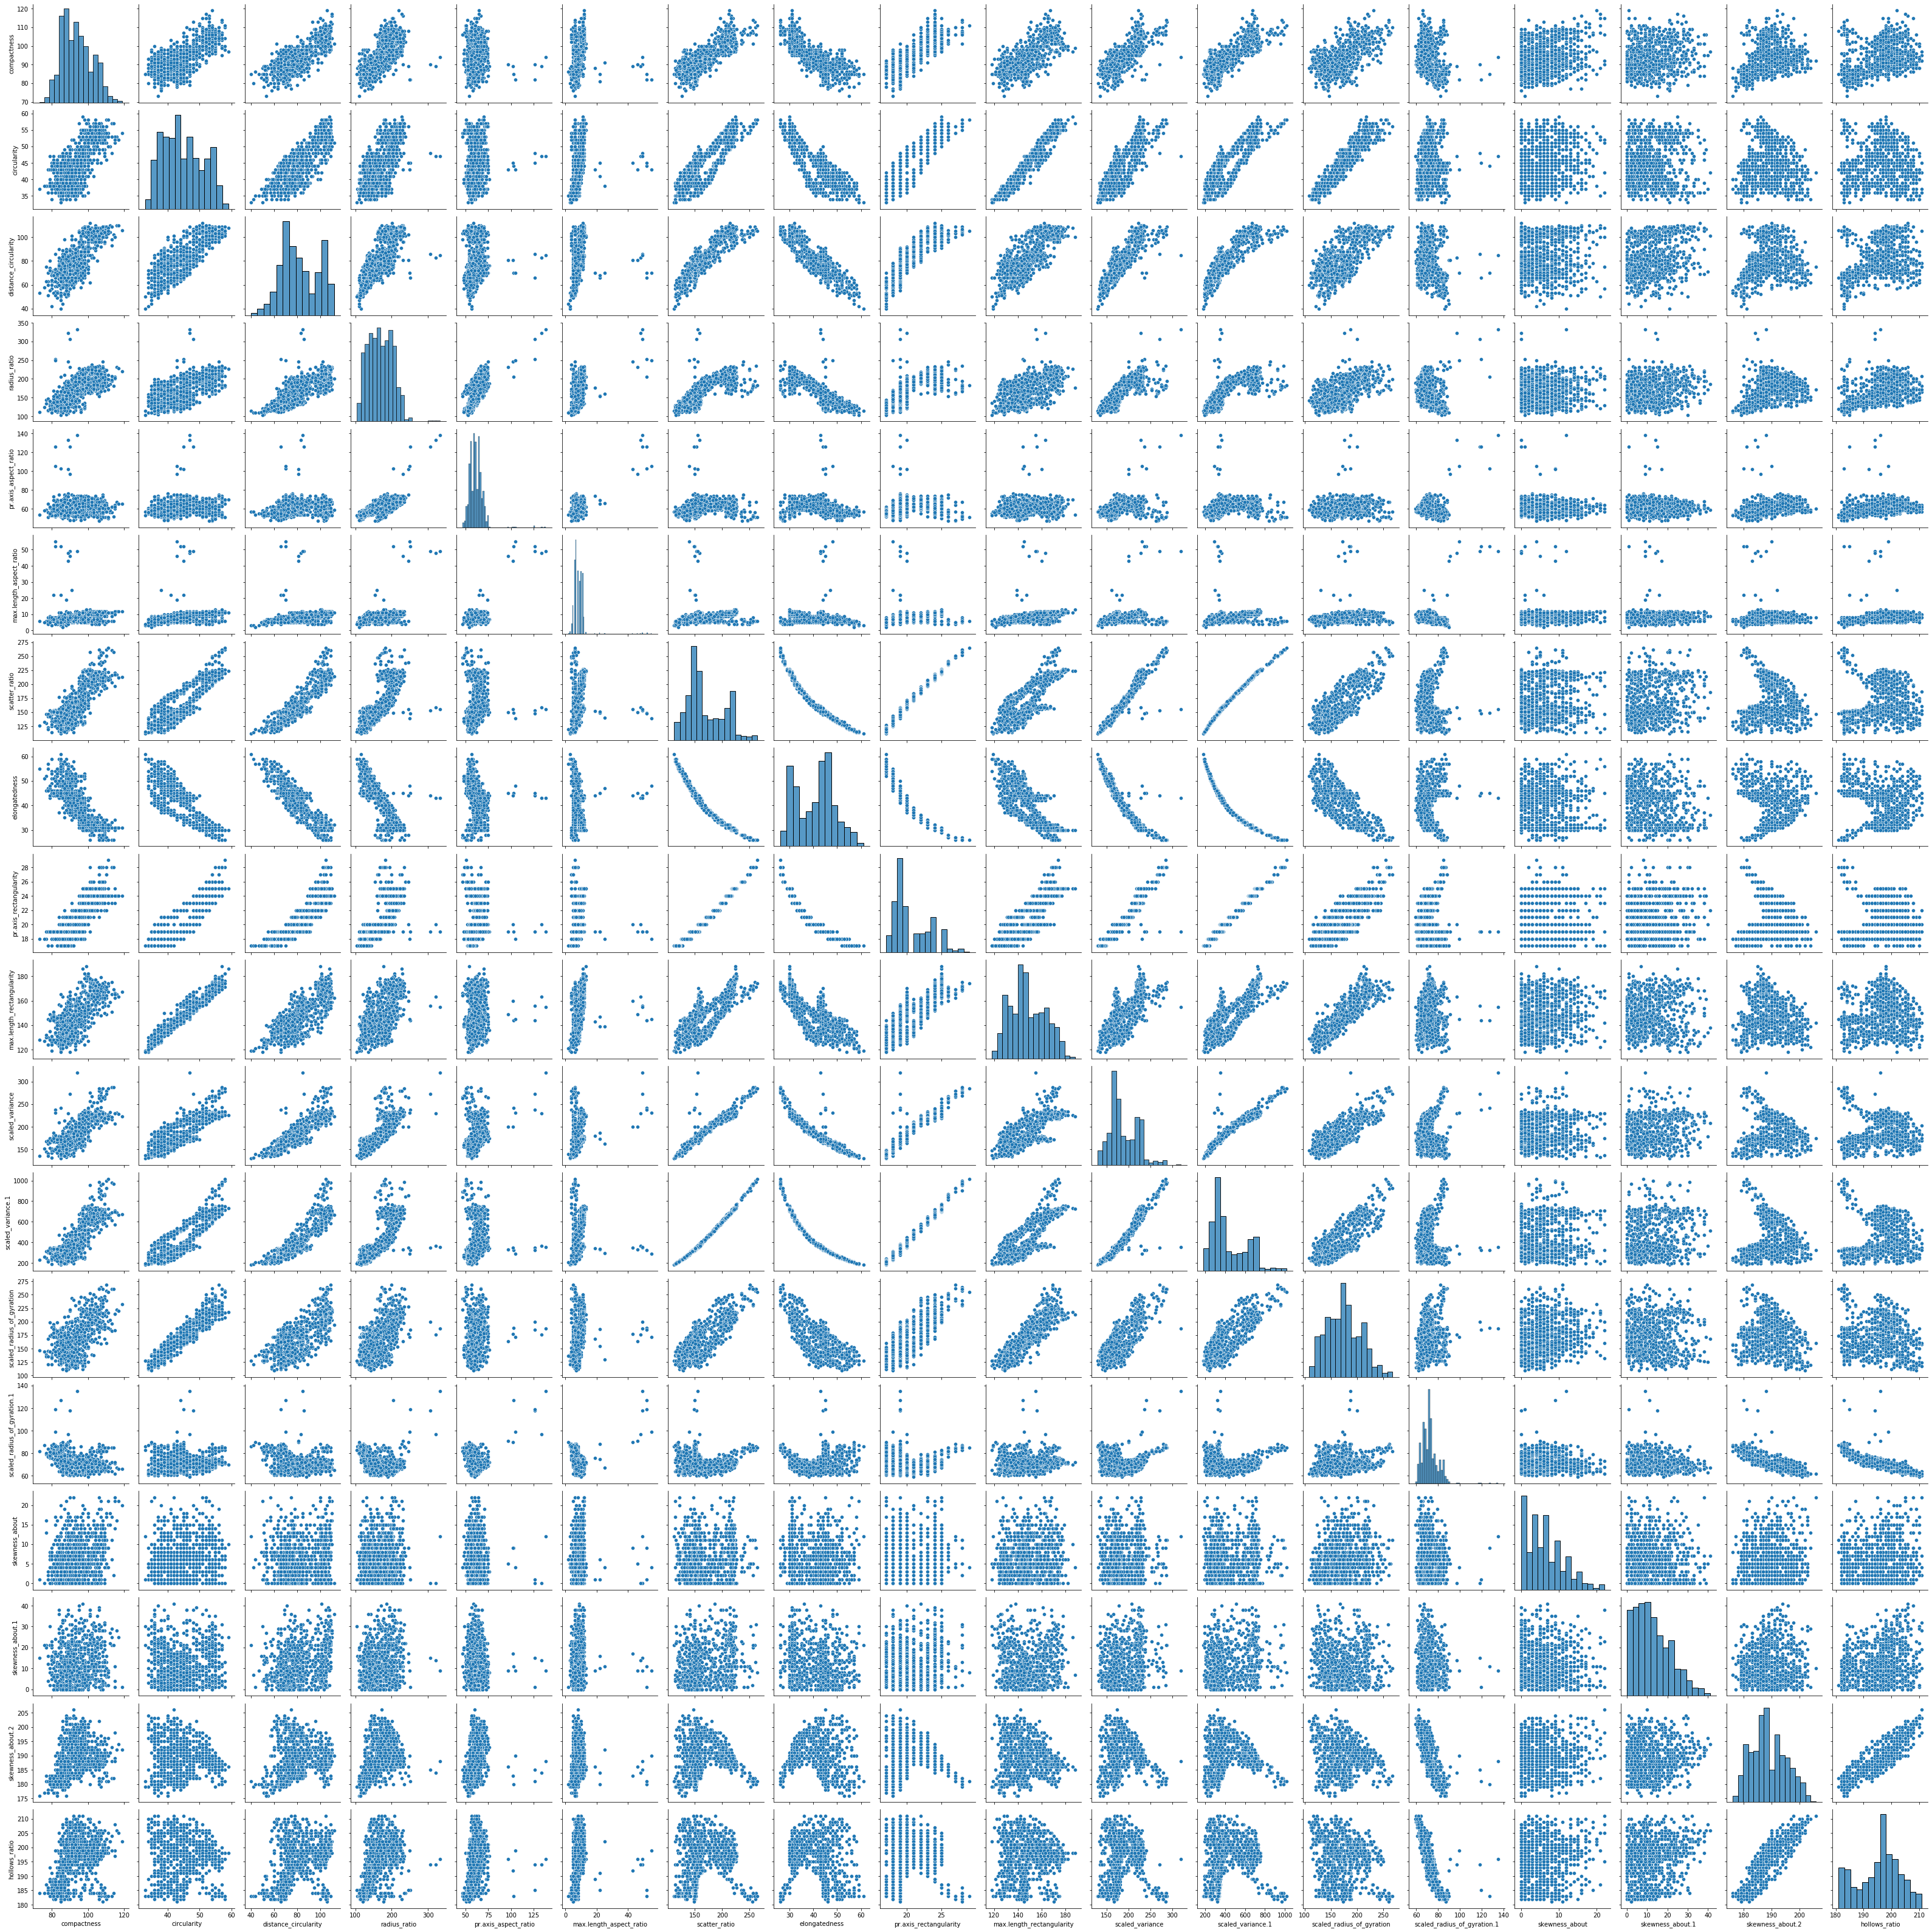

In [322]:
sns.pairplot(data)

In [ ]:
It is seen that many features are highly positively as well as negatively correlated.

In [ ]:
Checking for the presence of outliers:

In [331]:
numeric_cols=data1._get_numeric_data().columns

In [332]:
numeric_cols

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'],
      dtype='object')

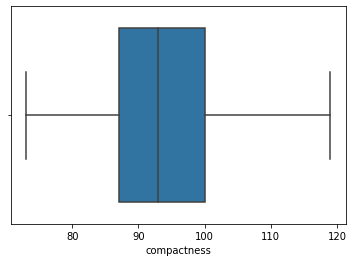

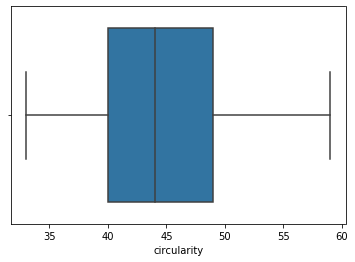

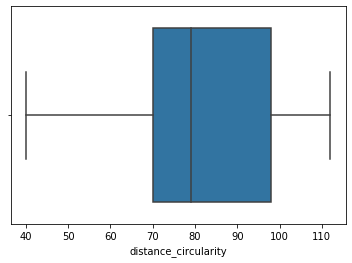

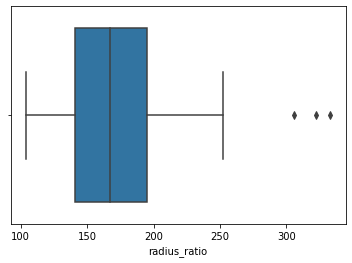

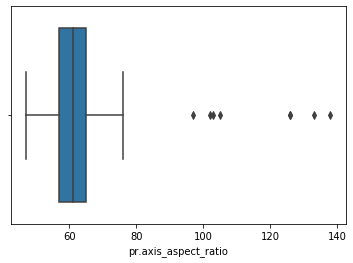

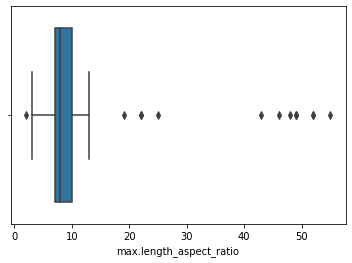

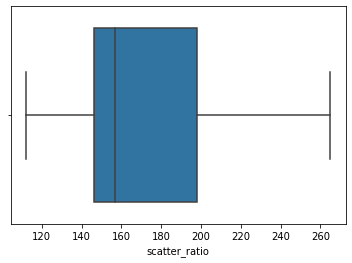

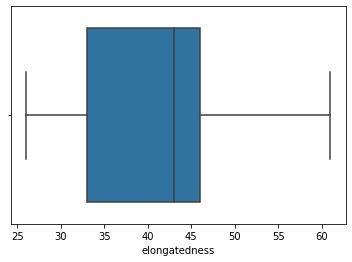

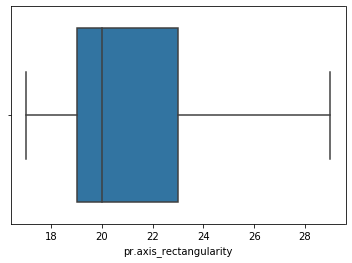

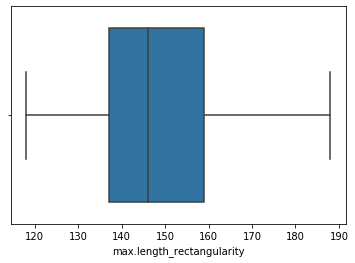

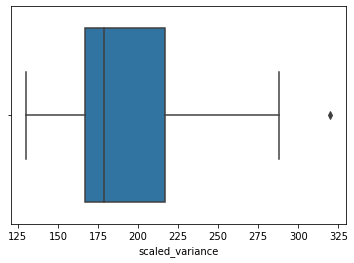

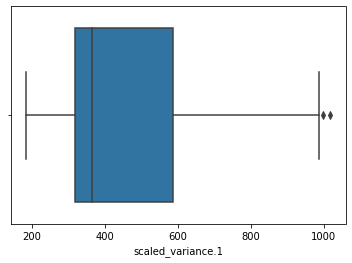

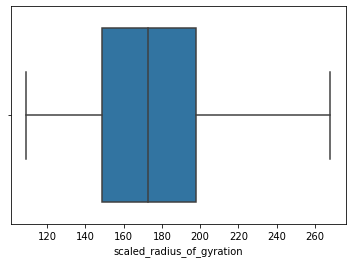

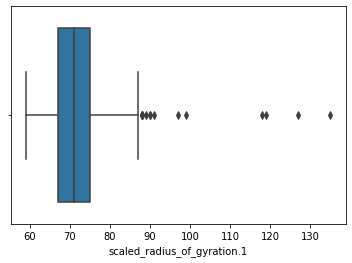

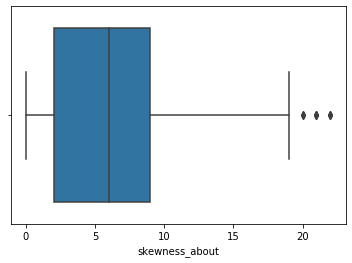

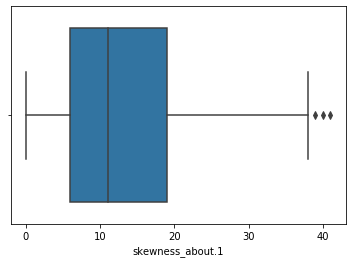

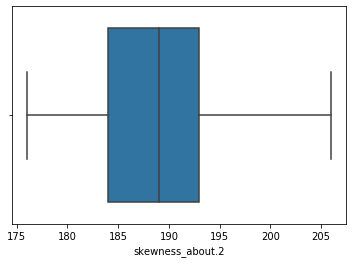

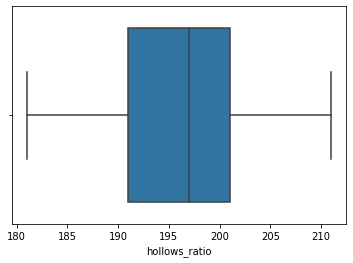

In [334]:
for col in numeric_cols:
    sns.boxplot(x=data1[col])
    plt.show()

In [ ]:
Many columns are found to have outliers. However, the outliers will not be removed as the removal may negatively impact the performance of the model.

In [ ]:
Obtaining the correlation matrix:

In [335]:
corr = data1.corr()
corr.style.background_gradient(cmap='coolwarm')

In [346]:
c1 = corr.abs().unstack()
c1=c1.sort_values(ascending = False)
c1>0.7

hollows_ratio                hollows_ratio                   True
pr.axis_rectangularity       pr.axis_rectangularity          True
skewness_about               skewness_about                  True
scaled_radius_of_gyration.1  scaled_radius_of_gyration.1     True
scaled_radius_of_gyration    scaled_radius_of_gyration       True
scaled_variance.1            scaled_variance.1               True
scaled_variance              scaled_variance                 True
max.length_rectangularity    max.length_rectangularity       True
elongatedness                elongatedness                   True
skewness_about.2             skewness_about.2                True
scatter_ratio                scatter_ratio                   True
max.length_aspect_ratio      max.length_aspect_ratio         True
pr.axis_aspect_ratio         pr.axis_aspect_ratio            True
radius_ratio                 radius_ratio                    True
distance_circularity         distance_circularity            True
circularit

In [ ]:
Splitting the input and output data:
    The input data is normalized by applying zscore in order to remove skewness and scale all the features in the same range.

In [98]:
x=data1.drop(columns='class')

In [99]:
x1=x.apply(zscore)

In [337]:
y=data1['class']

In [ ]:
In order to get the best features, the SelectKBest method is used. The number of best features to be selected is iterated from 5 till the original number of features present which is 18. In each iteration, the accuracy score is evaluated and used for deciding the optimal number of features.

In [365]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.svm import SVC
for k in range(5,19):
    print(k)
    select_k = k

# get only the numerical features.
    numerical_x_train = x1


# create the SelectKBest with the mutual info strategy.
    selection = SelectKBest(mutual_info_classif, k=select_k).fit(numerical_x_train, y)

# display the retained features.
    features = x1.columns[selection.get_support()]
    print(features)
    x1_train=x1[list(features)]
    x_train, x_test, y_train, y_test = train_test_split(x1_train, y, test_size = 0.2, random_state=42)
    classifier=SVC()
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    print(accuracy_score(y_test,y_pred))

5
Index(['scatter_ratio', 'elongatedness', 'pr.axis_rectangularity',
       'scaled_variance', 'scaled_variance.1'],
      dtype='object')
0.6748466257668712
6
Index(['distance_circularity', 'scatter_ratio', 'elongatedness',
       'pr.axis_rectangularity', 'scaled_variance', 'scaled_variance.1'],
      dtype='object')
0.7607361963190185
7
Index(['distance_circularity', 'radius_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'scaled_variance',
       'scaled_variance.1'],
      dtype='object')
0.7791411042944786
8
Index(['distance_circularity', 'radius_ratio', 'max.length_aspect_ratio',
       'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity',
       'scaled_variance', 'scaled_variance.1'],
      dtype='object')
0.852760736196319
9
Index(['compactness', 'distance_circularity', 'radius_ratio',
       'max.length_aspect_ratio', 'scatter_ratio', 'elongatedness',
       'pr.axis_rectangularity', 'scaled_variance', 'scaled_variance.1'],
      dtype='objec

In [ ]:
From the above iteration output, it is seen that taking all features into consideration gives the best accuracy score and thus all features will be considered.

In [347]:
x.shape

(813, 18)

In [ ]:
Implementing PCA in order to reduce the dimensions of the data:

Text(0, 0.5, 'cumulative explained variance')

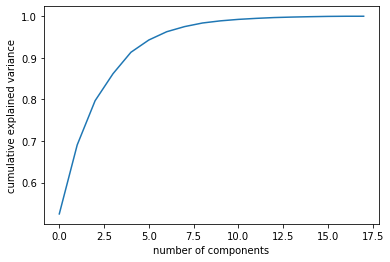

In [100]:
pca = PCA().fit(x1)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
From the plot above, it is seen that nearly 100% variance in data can be achieved using 10 principal components. Thus PCA is carried out to obtain 10 principal components from 18 features.

In [101]:
pca = PCA(10)
pca.fit(x1)
pca_transformed = pca.transform(x1)

In [ ]:
Printing the PCA Components and contribution of each feature to the component:

In [102]:
print(( pca.components_ ))

[[ 2.74447428e-01  2.94003600e-01  3.04380218e-01  2.68888600e-01
   8.30199914e-02  9.84825471e-02  3.16688948e-01 -3.13205048e-01
   3.13612229e-01  2.81285672e-01  3.09161565e-01  3.14163506e-01
   2.70337322e-01 -2.56036923e-02  3.96799548e-02  6.31600075e-02
   3.09410342e-02  7.93661290e-02]
 [-1.27105989e-01  1.34430321e-01 -7.21448351e-02 -1.76416250e-01
  -9.87633531e-02  3.02068515e-02  4.43899402e-02  1.52539710e-02
   5.72306050e-02  1.20324381e-01  6.19096771e-02  4.80210991e-02
   2.10169704e-01  4.93793797e-01 -5.62601909e-02 -1.21035426e-01
  -5.44491703e-01 -5.38881650e-01]
 [-1.15778231e-01 -3.64513515e-02 -5.51881577e-02  2.81804540e-01
   6.45768877e-01  5.86412351e-01 -9.85848213e-02  5.66515157e-02
  -1.12039253e-01 -2.41324720e-02  5.97234736e-02 -1.09452782e-01
  -3.70630986e-02  2.75779539e-01 -1.10191782e-01 -8.04993535e-02
   3.17280047e-02  5.69462532e-02]
 [ 8.00766389e-02  1.90342131e-01 -6.93709791e-02 -4.46505645e-02
   3.00532206e-02  2.97502955e-02 -9.

In [374]:
df=pd.DataFrame(pca_transformed)

In [375]:
df

0         1          2         3         4         5         6  \
0    0.352249 -0.141027   0.961832  0.190872  0.069616 -0.740301 -0.882080   
1   -1.578072 -0.422197  -0.365261  0.239334  0.685899 -0.530580  0.345639   
2    3.782556  0.253257   0.061756  1.216416  0.717337  0.728388 -0.015941   
3   -1.713214 -2.819496   0.186835  0.379588 -0.357389 -0.514101  0.450872   
4    0.532165  5.153595  11.400516  0.066717  3.242363 -0.360525  2.569695   
5   -0.757340 -2.200628  -0.038815  2.113390 -0.184767  0.782811 -0.129220   
6   -2.124718 -1.147112   0.679893  0.829662 -1.241508 -0.652884 -0.150782   
7   -4.429056 -3.115396   0.199756 -0.555543 -0.550594 -0.337523  0.255156   
8   -3.474658 -1.768798   0.337240 -0.427868 -0.676681 -0.334903  0.460851   
9   -4.356441 -2.466322  -0.703299 -1.308583  0.866320 -0.098117  0.307043   
10  -0.809415  0.065762   0.434514  0.307047 -0.572976 -0.044267 -1.309251   
11  -1.398713 -0.007883  -0.134120  0.150204  0.493796 -0.640061  0.257043   
12   1.220648 -0.818190   0.567613  1.196899 -1.382657  0.832032 -1.166590   
13   3.816579  1.359739   0.115468  1.055762 -1.140257 -0.091744 -0.706267   
14  -5.287221  1.705138  -0.596870 -0.866095  0.156362 -0.104008  0.810712   
15   0.373345 -1.569457   0.550317 -0.420121 -0.762193  1.692047  0.255522   
16   4.185046  1.206234  -0.472494  0.148973 -0.515770 -0.486136  0.228772   
17  -1.371071  1.209018   0.289798  0.076974 -1.675291 -0.224860 -0.796004   
18  -5.125560  2.246750   0.022791  0.563550 -0.065952  0.909733  0.311365   
19  -1.137457 -2.031950   0.667538  1.705005 -0.744816  0.552873 -0.426779   
20  -2.744375 -0.864246   0.178851  0.075932 -1.493192  0.030134  0.345089   
21   3.892086 -0.332124   0.533659  0.031645 -1.816003 -0.553328 -0.245230   
22  -1.432847  0.010160   0.594287  0.262985 -1.396892 -0.890520 -0.387558   
23  -4.846452  2.334517  -0.096433  0.198152 -0.049258  0.770631  0.443963   
24   4.642108  0.210812  -0.045482 -1.654623  0.005526 -0.661925 -0.134099   
25   1.560496 -0.271001  -0.074031 -0.021070 -0.599292  1.775335  0.652106   
26  -3.213271  2.197389  -0.391223 -0.806889  1.402837  0.460327 -0.274659   
27  -0.879300  0.348357   0.641516  0.226669 -0.272744 -0.769326 -0.077497   
28  -1.995914 -2.185707  -0.362875  0.977640  0.223377 -0.639067 -0.201003   
29  -2.987883 -2.435249  -0.391151 -0.393710 -0.217344  0.540137  0.613383   
30   3.968551 -1.039050   0.261199 -2.275229  1.246362 -0.036263 -0.804210   
31  -1.124695 -2.776549  -0.037064 -2.054769 -0.147910  0.097382 -0.002973   
32  -2.252679  2.897656  -0.626786  0.116868 -1.018823 -0.455341  0.207530   
33   3.070827  2.713825  13.522565 -0.972887  1.437275 -0.007457  0.614896   
34   4.050109  1.043577  -0.983840 -0.243642 -1.195485 -0.667811  0.974342   
35  -1.572021  1.414699   1.088464  1.121493 -0.871204  0.577543 -1.508307   
36   2.980703  0.705456   0.460214 -0.317391 -0.596269  0.864418 -0.219566   
37  -5.343207  2.369965  -0.710240 -0.369660  1.279206  0.333316  0.564755   
38  -0.213084  1.421702  -0.434957  0.819654 -0.476428 -1.554032  0.605586   
39  -1.082913 -1.206942   0.267707 -0.374194 -0.724500  1.041261  0.674551   
40   5.260700 -0.945429  -0.287131  3.098453  0.916997  0.545925  0.822628   
41  -0.394245  1.492441   0.153367  0.408758 -0.954592 -1.179855  0.508361   
42  -2.757975 -0.004584  -0.388467  0.086403 -0.961017 -1.053651  0.400060   
43  -2.589148  3.108305  -0.515053 -0.416170  0.547416  0.233590 -0.080742   
44  -0.479246  1.237450   0.505038  0.369750  0.130951 -1.304443 -0.490941   
45  -0.100617 -2.307870  -0.099747 -0.162988 -1.554576 -0.908972 -0.111280   
46  -3.864262  2.059467  -0.814440 -0.451919 -0.833946  0.145529  0.410357   
47  -1.775090 -0.894358   0.381217 -1.576851  0.509606  0.679798 -0.144391   
48   4.555712  0.675752   0.684790  0.130838 -1.764636  0.015984 -0.956459   
49  -1.077679 -3.045418   0.217252  0.734094 -0.418303  0.499126 -0.171264   
50   6.062936  3.323509  -1.937198

In [ ]:
Obtaining the best parameters for the SVM Classifier using grid search:

In [381]:
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
mdl = SVC( random_state = 1)
#acc=accuracy_score(y_test,y_pred)
grid_list = {"C": [1,10,100,1000],
             "gamma":[0.001,0.01,0.1,1],
            "kernel":['linear','poly','rbf']}
 
grid_search = GridSearchCV(mdl, param_grid = grid_list, cv = 3,scoring='f1_macro') 
grid_search.fit(x_train, y_train) 
#grid_search.cv_results_
grid_search.best_estimator_

SVC(C=100, gamma=0.01, random_state=1)

In [ ]:
From the grid search output above, it can be inferred that the best possible combination is C-100,gamma=0.01.

In [ ]:
Training the SVM Classifier and obtaining the confusion matrix,classification report and accuracy:

In [384]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size = 0.2, random_state=42)
classifier=SVC(C=100, gamma=0.01)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print(accuracy_score(y_test,y_pred))
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred),'\n')
print(classification_report(y_test, y_pred))

0.9877300613496932
Confusion Matrix
 [[36  0  0]
 [ 1 95  1]
 [ 0  0 30]] 

              precision    recall  f1-score   support

         bus       0.97      1.00      0.99        36
         car       1.00      0.98      0.99        97
         van       0.97      1.00      0.98        30

    accuracy                           0.99       163
   macro avg       0.98      0.99      0.99       163
weighted avg       0.99      0.99      0.99       163



In [ ]:
The accuracy is found to be 98.77%
The F1 Score are 0.99,0.99 and 0.98 for bus,car and van classes respectively.

In [ ]:
Conclusions about dimensionality reduction:
    i)Nearly 100% of the variance can be achieved through half the number of dimensions. As a result, the output achieved is nearly the same and takes lesser training time with reduced complexity.
    ii) The principal components can help determine the impact of each feature on the training of the model and the outcome as well.
    iii) The less desirable features which have poor significance in the performance can be eliminated as well.


# Part 4

In [ ]:
Reading the dataset:

In [103]:
part4=pd.read_csv('Part4 - batting_bowling_ipl_bat.csv')

In [411]:
part4

Name   Runs    Ave      SR  Fours  Sixes   HF
0                NaN    NaN    NaN     NaN    NaN    NaN  NaN
1           CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0
2                NaN    NaN    NaN     NaN    NaN    NaN  NaN
3          G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0
4                NaN    NaN    NaN     NaN    NaN    NaN  NaN
5           V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0
6                NaN    NaN    NaN     NaN    NaN    NaN  NaN
7           CL White  479.0  43.54  149.68   41.0   20.0  5.0
8                NaN    NaN    NaN     NaN    NaN    NaN  NaN
9           S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0
10               NaN    NaN    NaN     NaN    NaN    NaN  NaN
11         AM Rahane  560.0  40.00  129.33   73.0   10.0  5.0
12               NaN    NaN    NaN     NaN    NaN    NaN  NaN
13      KP Pietersen  305.0  61.00  147.34   22.0   20.0  3.0
14               NaN    NaN    NaN     NaN    NaN    NaN  NaN
15         RG Sharma  433.0  30.92  126.60   39.0   18.0  5.0
16               NaN    NaN    NaN     NaN    NaN    NaN  NaN
17    AB de Villiers  319.0  39.87  161.11   26.0   15.0  3.0
18               NaN    NaN    NaN     NaN    NaN    NaN  NaN
19         JP Duminy  244.0  81.33  128.42   13.0   11.0  2.0
20               NaN    NaN    NaN     NaN    NaN    NaN  NaN
21         DA Warner  256.0  36.57  164.10   28.0   14.0  3.0
22               NaN    NaN    NaN     NaN    NaN    NaN  NaN
23         SR Watson  255.0  42.50  151.78   26.0   14.0  2.0
24               NaN    NaN    NaN     NaN    NaN    NaN  NaN
25      F du Plessis  398.0  33.16  130.92   29.0   17.0  3.0
26               NaN    NaN    NaN     NaN    NaN    NaN  NaN
27           OA Shah  340.0  37.77  132.81   24.0   16.0  3.0
28               NaN    NaN    NaN     NaN    NaN    NaN  NaN
29          DJ Bravo  371.0  46.37  140.53   20.0   20.0  0.0
30               NaN    NaN    NaN     NaN    NaN    NaN  NaN
31         DJ Hussey  396.0  33.00  129.83   28.0   17.0  2.0
32               NaN    NaN    NaN     NaN    NaN    NaN  NaN
33          SK Raina  441.0  25.94  135.69   36.0   19.0  1.0
34               NaN    NaN    NaN     NaN    NaN    NaN  NaN
35         AT Rayudu  333.0  37.00  132.14   21.0   14.0  2.0
36               NaN    NaN    NaN     NaN    NaN    NaN  NaN
37     Mandeep Singh  432.0  27.00  126.31   53.0    7.0  2.0
38               NaN    NaN    NaN     NaN    NaN    NaN  NaN
39          R Dravid  462.0  28.87  112.13   63.0    4.0  2.0
40               NaN    NaN    NaN     NaN    NaN    NaN  NaN
41          DR Smith  157.0  39.25  160.20   18.0    7.0  1.0
42               NaN    NaN    NaN     NaN    NaN    NaN  NaN
43           M Vijay  336.0  25.84  125.84   39.0   10.0  2.0
44               NaN    NaN    NaN     NaN    NaN    NaN  NaN
45         SPD Smith  362.0  40.22  135.58   24.0   14.0  0.0
46               NaN    NaN    NaN     NaN    NaN    NaN  NaN
47        TM Dilshan  285.0  35.62  109.19   33.0    5.0  3.0
48               NaN    NaN    NaN     NaN    NaN    NaN  NaN
49        RV Uthappa  405.0  27.00  118.07   38.0   10.0  2.0
50               NaN    NaN    NaN     NaN    NaN    NaN  NaN
51          SE Marsh  336.0  30.54  120.00   39.0    7.0  2.0
52               NaN    NaN    NaN     NaN    NaN    NaN  NaN
53        KA Pollard  220.0  24.44  138.36   15.0   14.0  2.0
54               NaN    NaN    NaN     NaN    NaN    NaN  NaN
55   DMD Jayawardene  335.0  27.91  112.41   39.0    3.0  3.0
56               NaN    NaN    NaN     NaN    NaN    NaN  NaN
57           V Kohli  364.0  28.00  111.65   33.0    9.0  2.0
58               NaN    NaN    NaN     NaN    NaN    NaN  NaN
59        MA Agarwal  225.0  20.45  142.40   19.0   15.0  1.0
60               NaN    NaN    NaN     NaN    NaN    NaN  NaN
61      SR Tendulkar  324.0  29.45  114.48   39.0    4.0  2.0
62               NaN    NaN    NaN     NaN    NaN    NaN  NaN
63        MEK Hussey  261.0  32.62  110.59   28.

In [ ]:
Removing the null values:

In [104]:
part4_1=part4.dropna(axis=0,how='any')

In [105]:
part4_1=part4_1.reset_index(drop=True)

In [107]:
part4_1

Name   Runs    Ave      SR  Fours  Sixes   HF
0          CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0
1         G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0
2          V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0
3          CL White  479.0  43.54  149.68   41.0   20.0  5.0
4          S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0
5         AM Rahane  560.0  40.00  129.33   73.0   10.0  5.0
6      KP Pietersen  305.0  61.00  147.34   22.0   20.0  3.0
7         RG Sharma  433.0  30.92  126.60   39.0   18.0  5.0
8    AB de Villiers  319.0  39.87  161.11   26.0   15.0  3.0
9         JP Duminy  244.0  81.33  128.42   13.0   11.0  2.0
10        DA Warner  256.0  36.57  164.10   28.0   14.0  3.0
11        SR Watson  255.0  42.50  151.78   26.0   14.0  2.0
12     F du Plessis  398.0  33.16  130.92   29.0   17.0  3.0
13          OA Shah  340.0  37.77  132.81   24.0   16.0  3.0
14         DJ Bravo  371.0  46.37  140.53   20.0   20.0  0.0
15        DJ Hussey  396.0  33.00  129.83   28.0   17.0  2.0
16         SK Raina  441.0  25.94  135.69   36.0   19.0  1.0
17        AT Rayudu  333.0  37.00  132.14   21.0   14.0  2.0
18    Mandeep Singh  432.0  27.00  126.31   53.0    7.0  2.0
19         R Dravid  462.0  28.87  112.13   63.0    4.0  2.0
20         DR Smith  157.0  39.25  160.20   18.0    7.0  1.0
21          M Vijay  336.0  25.84  125.84   39.0   10.0  2.0
22        SPD Smith  362.0  40.22  135.58   24.0   14.0  0.0
23       TM Dilshan  285.0  35.62  109.19   33.0    5.0  3.0
24       RV Uthappa  405.0  27.00  118.07   38.0   10.0  2.0
25         SE Marsh  336.0  30.54  120.00   39.0    7.0  2.0
26       KA Pollard  220.0  24.44  138.36   15.0   14.0  2.0
27  DMD Jayawardene  335.0  27.91  112.41   39.0    3.0  3.0
28          V Kohli  364.0  28.00  111.65   33.0    9.0  2.0
29       MA Agarwal  225.0  20.45  142.40   19.0   15.0  1.0
30     SR Tendulkar  324.0  29.45  114.48   39.0    4.0  2.0
31       MEK Hussey  261.0  32.62  110.59   28.0    8.0  2.0
32        JH Kallis  409.0  25.56  106.51   34.0   10.0  2.0
33         MS Dhoni  357.0  29.75  128.41   26.0    9.0  1.0
34         MS Bisla  213.0  30.42  133.12   16.0   10.0  1.0
35         JD Ryder  256.0  25.60  120.75   23.0    8.0  2.0
36         BJ Hodge  245.0  30.62  140.00   18.0    9.0  0.0
37          NV Ojha  255.0  23.18  113.83   21.0   13.0  1.0
38           DB Das  126.0  42.00  135.48    9.0    6.0  0.0
39     AC Gilchrist  172.0  34.40  120.27   21.0    4.0  1.0
40      BB McCullum  289.0  24.08  102.12   37.0    3.0  1.0
41        IK Pathan  176.0  25.14  139.68   14.0    6.0  0.0
42    Azhar Mahmood  186.0  23.25  130.98   16.0    8.0  0.0
43        MK Pandey  143.0  20.42  127.67   12.0    6.0  1.0
44      S Badrinath  196.0  28.00  108.28   23.0    2.0  1.0
45        DA Miller   98.0  32.66  130.66    6.0    4.0  0.0
46        MK Tiwary  260.0  26.00  105.69   21.0    3.0  1.0
47        JA Morkel  107.0  15.28  157.35    5.0    6.0  0.0
48      LRPL Taylor  197.0  19.70  115.20   12.0    7.0  1.0
49         M Manhas  120.0  30.00  125.00   10.0    4.0  0.0
50     DT Christian  145.0  29.00  122.88    8.0    6.0  0.0
51        RA Jadeja  191.0  15.91  126.49   13.0    9.0  0.0
52     JEC Franklin  220.0  24.44   98.65   15.0    6.0  1.0
53    KC Sangakkara  200.0  18.18  108.69   21.0    4.0  1.0
54          Y Nagar  153.0  30.60  115.03   13.0    3.0  0.0
55        STR Binny   90.0  22.50  134.32    9.0    3.0  0.0
56        SS Tiwary  191.0  23.87  112.35    9.0    8.0  0.0
57       KD Karthik  238.0  18.30  111.73   30.0    2.0  0.0
58       AL Menaria  220.0  20.00  108.91   14.0    8.0  0.0
59         PA Patel  194.0  17.63  117.57   19.0    4.0  0.0
60       SC Ganguly  268.0  17.86   98.89   30.0    4.0  0.0
61        YK Pathan  194.0  19.40  114.79   10.0    7.0  0.0
62  Harbhajan Singh  108.0  12.00  135.00   14.0    3.0  0.0
63          RE Levi   83.0  13.83  113.69   10.0    4.0  1.0
64        LR Shukla   75.0  12.50  131.57    4.0  

In [ ]:
Obtaining the shape and type of data in each column after removing the null values:

In [422]:
part4_1.shape

(90, 7)

In [423]:
part4.dtypes

Name      object
Runs     float64
Ave      float64
SR       float64
Fours    float64
Sixes    float64
HF       float64
dtype: object

In [108]:
part4_1.describe()

Runs        Ave          SR      Fours      Sixes         HF
count   90.000000  90.000000   90.000000  90.000000  90.000000  90.000000
mean   219.933333  24.729889  119.164111  19.788889   7.577778   1.188889
std    156.253669  13.619215   23.656547  16.399845   8.001373   1.688656
min      2.000000   0.500000   18.180000   0.000000   0.000000   0.000000
25%     98.000000  14.665000  108.745000   6.250000   3.000000   0.000000
50%    196.500000  24.440000  120.135000  16.000000   6.000000   0.500000
75%    330.750000  32.195000  131.997500  28.000000  10.000000   2.000000
max    733.000000  81.330000  164.100000  73.000000  59.000000   9.000000

In [109]:
columns=list(part4_1.describe().columns)

In [111]:
part4_1[columns].skew()

Runs     0.754618
Ave      1.038076
SR      -1.166175
Fours    1.107192
Sixes    3.226595
HF       2.001199
dtype: float64

Runs


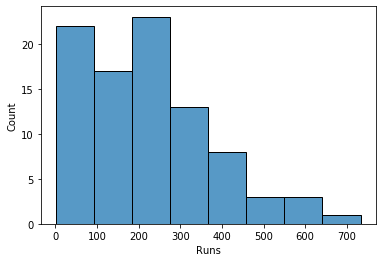

Ave


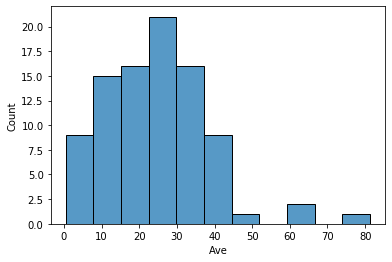

SR


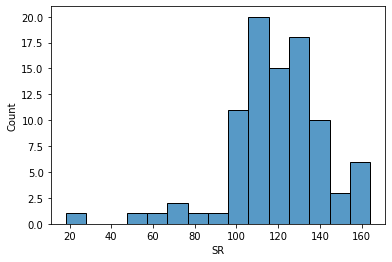

Fours


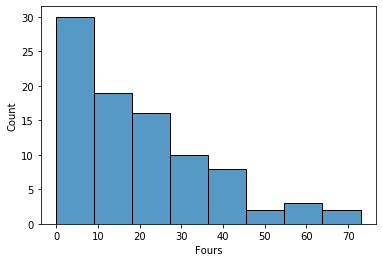

Sixes


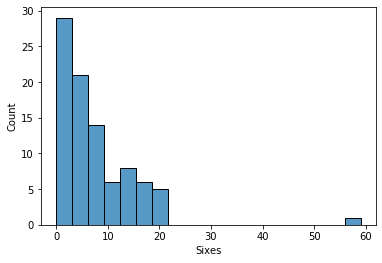

HF


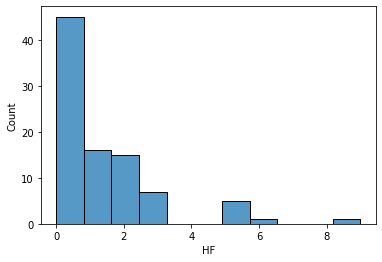

In [110]:
for col in columns:
    print(col)
    sns.histplot(part4_1[col])
    plt.show()

In [ ]:
From the skewness output and the histplots, it can be seen that most of the columns such as average,fours,sixes and half century columns are left skewed while strike rate column distribution is right skewed.
Since the dataset contains both batsmen and bowlers and the strike rate of most players is present between 100-140, it may not be a good indicator of the quality of the batsman.

In [ ]:
Analyzing the relationship between different variables through pairplot:

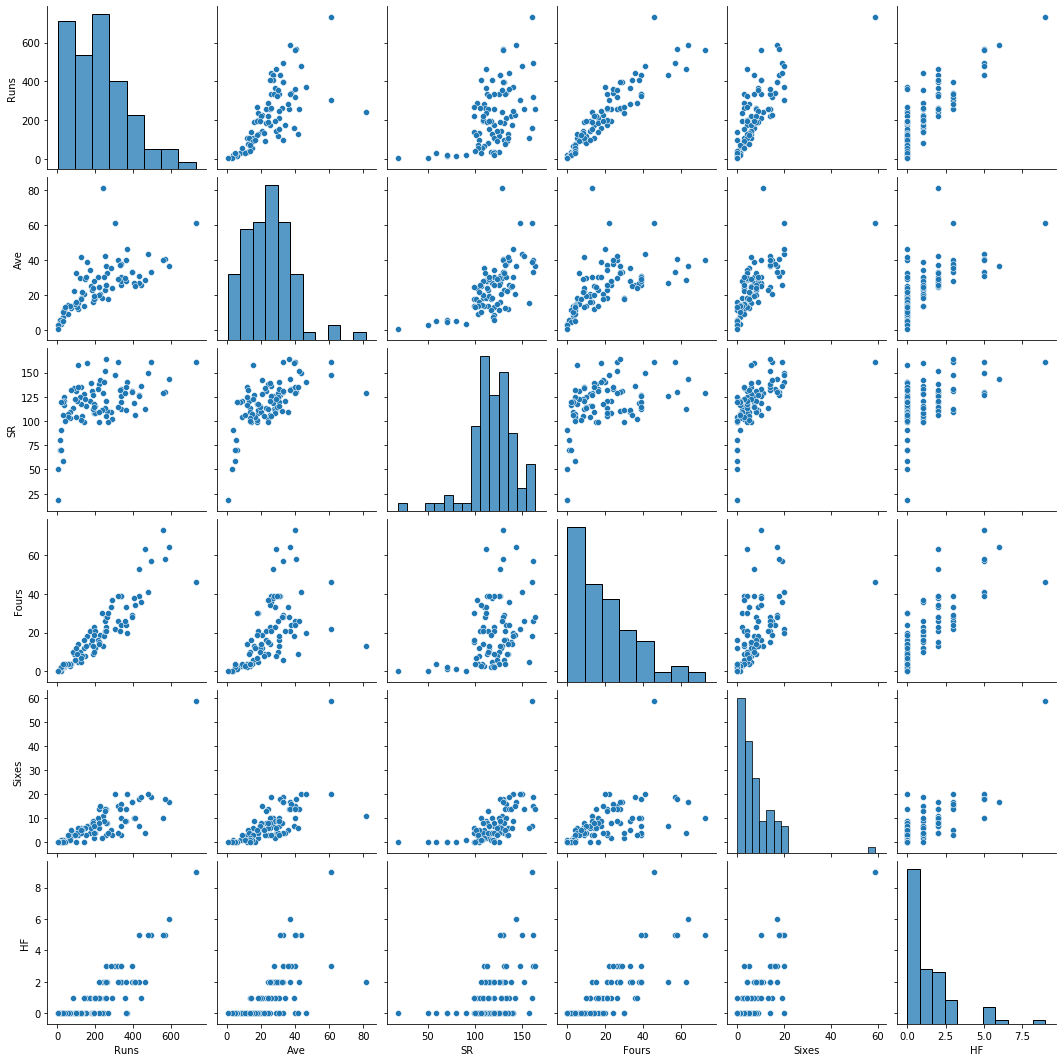

In [424]:
sns.pairplot(part4_1)

In [ ]:
Many features are fairly positively correlated which is expected for a batsman.

In [ ]:
Checking for the presence of outliers:

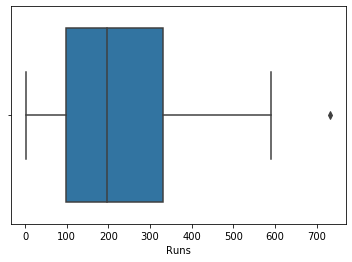

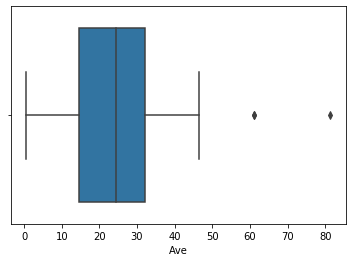

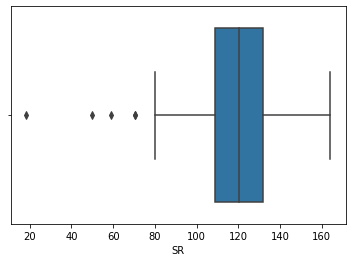

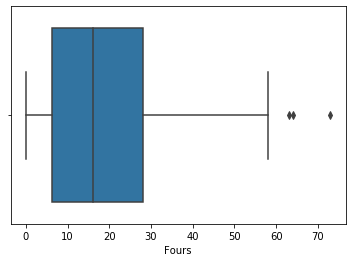

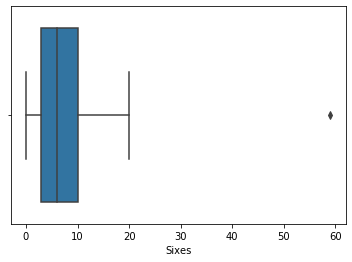

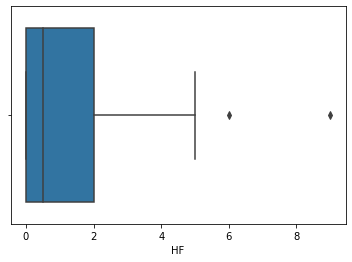

In [126]:
for col in columns:
    sns.boxplot(x=col,data=part4_1)
    plt.show()

In [ ]:
The boxplots above for each column indicate the presence of outliers in several columns. 

In [ ]:
Applying z-score and normalizing in order to remove skewness and ensure equalize the range of data values present in all columns:

In [ ]:
The name column is removed since it is not relevant in predicting the ranking.

In [112]:
part4_num=part4_1.drop(columns='Name')
part4_scaled=part4_num.apply(zscore)

In [113]:
part4_scaled

Runs       Ave        SR     Fours     Sixes        HF
0   3.301945  2.683984  1.767325  1.607207  6.462679  4.651551
1   2.381639  0.896390  1.036605  2.710928  1.184173  2.865038
2   1.770248  0.610640  1.788154  2.281703  1.435530  2.269533
3   1.667276  1.388883  1.297182  1.300618  1.561209  2.269533
4   2.246490  1.174755  0.444038  2.343021  1.309851  2.269533
5   2.188568  1.127500  0.432136  3.262788  0.304422  2.269533
6   0.547464  2.678077  1.197712  0.135580  1.561209  1.078525
7   1.371234  0.457059  0.316088  1.177983  1.309851  2.269533
8   0.637564  1.117901  1.783053  0.380852  0.932815  1.078525
9   0.154886  4.179184  0.393453 -0.416280  0.430100  0.483020
10  0.232114  0.874239  1.910153  0.503487  0.807137  1.078525
11  0.225679  1.312092  1.386450  0.380852  0.807137  0.483020
12  1.145984  0.622454  0.499724  0.564805  1.184173  1.078525
13  0.772713  0.962843  0.580065  0.258216  1.058494  1.078525
14  0.972220  1.597841  0.908230  0.012945  1.561209 -0.707989
15  1.133113  0.610640  0.453390  0.503487  1.184173  0.483020
16  1.422720  0.089351  0.702489  0.994030  1.435530 -0.112484
17  0.727664  0.905988  0.551584  0.074263  0.807137  0.483020
18  1.364798  0.167618  0.303760  2.036432 -0.072614  0.483020
19  1.557869  0.305693 -0.299009  2.649610 -0.449651  0.483020
20 -0.405020  1.072122  1.744371 -0.109691 -0.072614 -0.112484
21  0.746971  0.081967  0.283781  1.177983  0.304422  0.483020
22  0.914299  1.143744  0.697813  0.258216  0.807137 -0.707989
23  0.418750  0.804093 -0.423984  0.810076 -0.323972  1.078525
24  1.191034  0.167618 -0.046509  1.116665  0.304422  0.483020
25  0.746971  0.429001  0.035532  1.177983 -0.072614  0.483020
26  0.000429 -0.021405  0.815987 -0.293644  0.807137  0.483020
27  0.740535  0.234810 -0.287107  1.177983 -0.575329  1.078525
28  0.927170  0.241455 -0.319413  0.810076  0.178743  0.483020
29  0.032608 -0.316014  0.987721 -0.048373  0.932815 -0.112484
30  0.669742  0.348519 -0.199114  1.177983 -0.449651  0.483020
31  0.264293  0.582582 -0.364472  0.503487  0.053064  0.483020
32  1.216777  0.061293 -0.537906  0.871394  0.304422  0.483020
33  0.882120  0.370670  0.393028  0.380852  0.178743 -0.112484
34 -0.044621  0.420141  0.593243 -0.232326  0.304422 -0.112484
35  0.232114  0.064246  0.067414  0.196898  0.053064  0.483020
36  0.161322  0.434908  0.885701 -0.109691  0.178743 -0.707989
37  0.225679 -0.114439 -0.226745  0.074263  0.681458 -0.112484
38 -0.604527  1.275174  0.693563 -0.661551 -0.198293 -0.707989
39 -0.308485  0.714012  0.047010  0.074263 -0.449651 -0.112484
40  0.444493 -0.047986 -0.724518  1.055347 -0.575329 -0.112484
41 -0.282742  0.030281  0.872098 -0.354962 -0.198293 -0.707989
42 -0.218385 -0.109271  0.502275 -0.232326  0.053064 -0.707989
43 -0.495120 -0.318229  0.361572 -0.477597 -0.198293 -0.112484
44 -0.154028  0.241455 -0.462666  0.196898 -0.701008 -0.112484
45 -0.784727  0.585536  0.488672 -0.845504 -0.449651 -0.707989
46  0.257857  0.093781 -0.572763  0.074263 -0.575329 -0.112484
47 -0.726805 -0.697752  1.623222 -0.906822 -0.198293 -0.707989
48 -0.147592 -0.371392 -0.168508 -0.477597 -0.072614 -0.112484
49 -0.643141  0.389129  0.248074 -0.600233 -0.449651 -0.707989
50 -0.482249  0.315292  0.157957 -0.722869 -0.198293 -0.707989
51 -0.186206 -0.651234  0.311412 -0.416280  0.178743 -0.707989
52  0.000429 -0.021405 -0.872022 -0.293644 -0.198293 -0.112484
53 -0.128285 -0.483624 -0.445238  0.074263 -0.449651 -0.112484
54 -0.430763  0.433432 -0.175735 -0.416280 -0.575329 -0.707989
55 -0.836212 -0.164648  0.644253 -0.661551 -0.575329 -0.707989
56 -0.186206 -0.063492 -0.289657 -0.661551  0.053064 -0.707989
57  0.116272 -0.474764 -0.316012  0.626123 -0.701008 -0.707989
58  0.000429 -0.349241 -0.435886 -0.354962  0.053064 -0.707989
59 -0.166899 -0.524235 -0.067763 -0.048373 -0.449651 -0.707989
60  0.309343 -0.507252 -0.861820  0.626123 -0.449651 -0.707989
61 -0.166899 -0.393543 -0.185937 -0.600233 -0.072614 -0.707989
62 -0.720370 -0.939937  0.673159 -0.354

In [ ]:
The Strike Rate column is removed since it can be high for both batsmen and bowlers. Bowlers who do not score many runs can have high strike rates and may be ranked higher.

In [116]:
part4_scaled1=part4_scaled.drop(columns='SR')

In [462]:
pca.explained_variance_ratio_

array([0.77422075, 0.11580216, 0.07247383, 0.0337865 , 0.00371676])

Text(0, 0.5, 'cumulative explained variance')

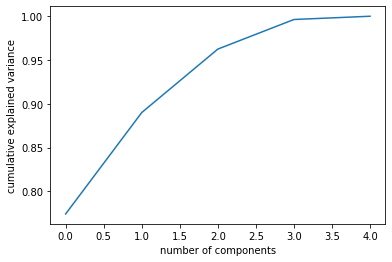

In [461]:

pca = PCA().fit(part4_scaled1)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
From the outputs above, the variance ratio of the 1st component alone is nearly 75%

In [ ]:
Fitting PCA with 5 components and transforming the data:

In [114]:
pca = PCA(5)

In [117]:
pca.fit(part4_scaled1)

PCA(n_components=5)

In [118]:
pca_transformed=pca.transform(part4_scaled1)

In [ ]:
Displaying the pca components and contribution of each feature to the component:

In [119]:
print(( pca.components_ ))

[[ 0.4895695   0.4050503   0.43938875  0.43195284  0.46541404]
 [-0.22342133  0.56382092 -0.61789146  0.48514672 -0.12260375]
 [-0.04909994 -0.6952549  -0.24824336  0.56248593  0.36904557]
 [ 0.44105372 -0.18262649  0.12864348  0.3818643  -0.78086471]
 [ 0.71656502 -0.03617192 -0.58904478 -0.34035077  0.14971228]]


In [120]:
pca_data=pd.DataFrame(pca_transformed)

In [121]:
pca_data

0         1         2         3         4
0   8.366338  2.347531  2.924643  0.008560 -0.180927
1   4.565148 -1.478532  0.310283 -0.549544  0.103215
2   3.792908 -1.042875  0.567139 -0.261239 -0.246423
3   3.680933  0.086097  0.345359 -0.527001  0.186769
4   4.227212 -0.930078  0.065638 -0.194317  0.081087
5   4.149551 -1.999878 -0.692529 -0.476849 -0.158294
6   2.588679  1.929051 -0.646301 -0.476197 -0.154331
7   2.996105 -0.419312  0.896808 -0.599156  0.166129
8   1.837172  0.572847  0.019646 -0.359937  0.036065
9   1.996286  2.728364 -2.389682 -0.961402  0.130953
10  1.539579  0.389303  0.107825 -0.526479 -0.275116
11  1.382740  0.786398 -0.385604 -0.160049 -0.312482
12  2.074800  0.188194  0.434864  0.074434  0.224396
13  1.840934  0.591975  0.221951 -0.239795  0.167980
14  1.473724  1.519901 -0.544978  1.287672 -0.006116
15  1.759615  0.295307  0.239163  0.528035  0.162564
16  1.737207 -0.171457  0.387215  1.375066 -0.074713
17  1.329292  0.634713 -0.051797  0.096078  0.242507
18  1.824281 -1.563161 -0.551668  0.428409 -0.130618
19  2.081292 -2.090243 -1.021440  0.423252 -0.230129
20  0.104063  0.741314 -0.780638 -0.328438 -0.256517
21  1.272788 -0.760071 -0.036601  0.205099 -0.192893
22  1.043481  0.759425 -0.711463  1.088655  0.080978
23  1.248664 -0.430137 -0.564911 -0.823842  0.065537
24  1.497938 -0.773104 -0.102732  0.377425  0.158328
25  1.250492 -0.747324 -0.489956 -0.002255 -0.077121
26  0.435966  0.501636  0.720015 -0.102634 -0.028344
27  1.228691 -1.172276 -0.417629 -0.626606  0.185545
28  1.209667 -0.544055 -0.135696  0.160129  0.189952
29  0.217288  0.310772  0.713301  0.509915 -0.271035
30  1.017222 -0.958365 -0.642286 -0.165596 -0.001224
31  0.834317 -0.075153 -0.334903 -0.281967 -0.074013
32  1.359705 -0.687253  0.030814  0.376644  0.325097
33  0.774198 -0.122910 -0.336537  0.526453  0.316675
34  0.125396  0.551886 -0.102519  0.077786 -0.030771
35  0.473900 -0.170774  0.103161 -0.240939  0.102273
36 -0.045358  0.450463 -0.443803  0.598714 -0.002351
37  0.338768  0.183567  0.391847  0.478049 -0.126666
38 -0.485288  1.253401 -1.065480 -0.107491 -0.128131
39 -0.075763  0.221255 -0.794143 -0.340773 -0.154422
40  0.361014 -1.043783 -0.615571  0.208709 -0.122430
41 -0.697284  0.290173 -0.291871  0.301224 -0.033115
42 -0.559843  0.243281 -0.087065  0.466856 -0.139739
43 -0.719151  0.143889  0.211072 -0.209583 -0.011300
44 -0.246245 -0.277412 -0.645008 -0.266556 -0.013338
45 -1.042247  0.896547 -0.672878 -0.180672 -0.038404
46 -0.104011 -0.315949 -0.461424 -0.025707  0.316609
47 -1.452055  0.319895  0.373097  0.167333  0.000089
48 -0.516258  0.097242  0.301663  0.001396  0.196875
49 -0.944717  0.602625 -0.604164 -0.050803 -0.074320
50 -0.841166  0.722768 -0.388900  0.113852  0.030329
51 -0.790151  0.105157  0.404516  0.604353 -0.031495
52 -0.275489  0.086866 -0.065293 -0.021563  0.224700
53 -0.472646 -0.494258  0.029672 -0.042575  0.018024
54 -0.796258  0.405518 -0.761751  0.010448  0.010679
55 -1.344776  0.310445 -0.265138 -0.090704 -0.113743
56 -0.714143  0.527117 -0.013921  0.417471  0.134496
57 -0.492579 -0.933825 -0.486645  0.503686 -0.135731
58 -0.603803  0.134869  0.099475  0.591413  0.097974
59 -0.839040 -0.359741 -0.129522  0.397043 -0.025093
60 -0.302642 -0.873333 -0.332152  0.690759 -0.081758
61 -0.865723  0.237853  0.128687  0.446158  0.166925
62 -1.467382 -0.341999  0.192088  0.141418 -0.183285
63 -1.267745 -0.090356  0.457392 -0.402790 -0.112607
64 -1.717251  0.227089  0.470451  0.058108 -0.061163
65 -1.145767  0.389072 -0.096136  0.123351  0.031849
66 -1.412079  0.288257  0.078572  0.089553  0.170232
67 -1.516723 -0.036674  0.275352  0.127437 -0.058027
68 -1.641975  0.117100  0.157014 -0.012553  0.018830
69 -1.138564 -0.636454  0.056553 -0.387929  0.104186
70 -1.326219  0.259866  0.141844  0.150604  0.042533
71 -1.586135 -0.254501 -0.208669 -0.105108 -0.040403
72 -2.139839 -0.055230  0.172750 -0.284065 -0.029510
73 -1.896212  0.137917  0.219338 -0.128459  0.068061
74 -2.139436  0.081519  0.273886 -0.

In [ ]:
Scoring each sample based on all PCA Components using score_samples function:

In [469]:
rankscore=pca.score_samples(pca_data)

In [470]:
rankscore

array([-523.9040459 , -316.54661526, -179.80448123, -194.0562619 ,
       -271.07325705, -361.6441398 , -148.5290417 , -100.98568368,
        -56.3792479 , -264.18272037,  -39.8462479 ,  -41.68192458,
        -44.4950117 ,  -46.39969063,  -26.58790403,  -28.1163202 ,
        -16.42573627,  -26.94427277,  -71.06273372, -118.42569373,
        -11.6443851 ,  -24.57986928,  -20.20053642,  -64.58746849,
        -34.37259754,  -41.92206313,   -2.64713152,  -56.13897669,
        -26.5317441 ,   -8.98274348,  -41.3146724 ,  -22.64347683,
        -25.45977797,  -12.74428354,   -2.18620503,   -5.68243123,
         -2.2717301 ,   -3.09272799,   -6.5465422 ,   -8.63651887,
        -12.09657404,   -7.48885033,   -9.6321324 ,  -10.96893975,
         -4.36205159,   -7.51377898,   -4.05377214,  -49.77585275,
         -9.27348878,   -6.4383737 ,   -8.2740948 ,  -29.37741414,
         -2.35792386,   -4.66360452,   -3.66593724,  -20.46149688,
        -13.43277108,   -4.59701288,  -14.35018958,  -13.45005

In [471]:
pca_data['rank_score']=abs(rankscore)

In [472]:
pca_data

0         1         2         3         4  rank_score
0   8.366338  2.347531  2.924643  0.008560 -0.180927  523.904046
1   4.565148 -1.478532  0.310283 -0.549544  0.103215  316.546615
2   3.792908 -1.042875  0.567139 -0.261239 -0.246423  179.804481
3   3.680933  0.086097  0.345359 -0.527001  0.186769  194.056262
4   4.227212 -0.930078  0.065638 -0.194317  0.081087  271.073257
5   4.149551 -1.999878 -0.692529 -0.476849 -0.158294  361.644140
6   2.588679  1.929051 -0.646301 -0.476197 -0.154331  148.529042
7   2.996105 -0.419312  0.896808 -0.599156  0.166129  100.985684
8   1.837172  0.572847  0.019646 -0.359937  0.036065   56.379248
9   1.996286  2.728364 -2.389682 -0.961402  0.130953  264.182720
10  1.539579  0.389303  0.107825 -0.526479 -0.275116   39.846248
11  1.382740  0.786398 -0.385604 -0.160049 -0.312482   41.681925
12  2.074800  0.188194  0.434864  0.074434  0.224396   44.495012
13  1.840934  0.591975  0.221951 -0.239795  0.167980   46.399691
14  1.473724  1.519901 -0.544978  1.287672 -0.006116   26.587904
15  1.759615  0.295307  0.239163  0.528035  0.162564   28.116320
16  1.737207 -0.171457  0.387215  1.375066 -0.074713   16.425736
17  1.329292  0.634713 -0.051797  0.096078  0.242507   26.944273
18  1.824281 -1.563161 -0.551668  0.428409 -0.130618   71.062734
19  2.081292 -2.090243 -1.021440  0.423252 -0.230129  118.425694
20  0.104063  0.741314 -0.780638 -0.328438 -0.256517   11.644385
21  1.272788 -0.760071 -0.036601  0.205099 -0.192893   24.579869
22  1.043481  0.759425 -0.711463  1.088655  0.080978   20.200536
23  1.248664 -0.430137 -0.564911 -0.823842  0.065537   64.587468
24  1.497938 -0.773104 -0.102732  0.377425  0.158328   34.372598
25  1.250492 -0.747324 -0.489956 -0.002255 -0.077121   41.922063
26  0.435966  0.501636  0.720015 -0.102634 -0.028344    2.647132
27  1.228691 -1.172276 -0.417629 -0.626606  0.185545   56.138977
28  1.209667 -0.544055 -0.135696  0.160129  0.189952   26.531744
29  0.217288  0.310772  0.713301  0.509915 -0.271035    8.982743
30  1.017222 -0.958365 -0.642286 -0.165596 -0.001224   41.314672
31  0.834317 -0.075153 -0.334903 -0.281967 -0.074013   22.643477
32  1.359705 -0.687253  0.030814  0.376644  0.325097   25.459778
33  0.774198 -0.122910 -0.336537  0.526453  0.316675   12.744284
34  0.125396  0.551886 -0.102519  0.077786 -0.030771    2.186205
35  0.473900 -0.170774  0.103161 -0.240939  0.102273    5.682431
36 -0.045358  0.450463 -0.443803  0.598714 -0.002351    2.271730
37  0.338768  0.183567  0.391847  0.478049 -0.126666    3.092728
38 -0.485288  1.253401 -1.065480 -0.107491 -0.128131    6.546542
39 -0.075763  0.221255 -0.794143 -0.340773 -0.154422    8.636519
40  0.361014 -1.043783 -0.615571  0.208709 -0.122430   12.096574
41 -0.697284  0.290173 -0.291871  0.301224 -0.033115    7.488850
42 -0.559843  0.243281 -0.087065  0.466856 -0.139739    9.632132
43 -0.719151  0.143889  0.211072 -0.209583 -0.011300   10.968940
44 -0.246245 -0.277412 -0.645008 -0.266556 -0.013338    4.362052
45 -1.042247  0.896547 -0.672878 -0.180672 -0.038404    7.513779
46 -0.104011 -0.315949 -0.461424 -0.025707  0.316609    4.053772
47 -1.452055  0.319895  0.373097  0.167333  0.000089   49.775853
48 -0.516258  0.097242  0.301663  0.001396  0.196875    9.273489
49 -0.944717  0.602625 -0.604164 -0.050803 -0.074320    6.438374
50 -0.841166  0.722768 -0.388900  0.113852  0.030329    8.274095
51 -0.790151  0.105157  0.404516  0.604353 -0.031495   29.377414
52 -0.275489  0.086866 -0.065293 -0.021563  0.224700    2.357924
53 -0.472646 -0.494258  0.029672 -0.042575  0.018024    4.663605
54 -0.796258  0.405518 -0.761751  0.010448  0.010679    3.665937
55 -1.344776  0.310445 -0.265138 -0.090704 -0.113743   20.461497
56 -0.714143  0.527117 -0.013921  0.417471  0.134496   13.432771
57 -0.492579 -0.933825 -0.486645  0.503686 -0.135731    4.597013
58 -0.603803  0.134869  0.099475  0.591413  0.097974   14.350190
59 -0.839040 -0.359741 -0.129522  0.397043 -0.025093   13.450051
60 -0.302642 -0.873333 -0.332152  0.690759 -0.

In [473]:
pca_data['name']=part4_1['Name']

In [474]:
pca_data

0         1         2         3         4  rank_score  \
0   8.366338  2.347531  2.924643  0.008560 -0.180927  523.904046   
1   4.565148 -1.478532  0.310283 -0.549544  0.103215  316.546615   
2   3.792908 -1.042875  0.567139 -0.261239 -0.246423  179.804481   
3   3.680933  0.086097  0.345359 -0.527001  0.186769  194.056262   
4   4.227212 -0.930078  0.065638 -0.194317  0.081087  271.073257   
5   4.149551 -1.999878 -0.692529 -0.476849 -0.158294  361.644140   
6   2.588679  1.929051 -0.646301 -0.476197 -0.154331  148.529042   
7   2.996105 -0.419312  0.896808 -0.599156  0.166129  100.985684   
8   1.837172  0.572847  0.019646 -0.359937  0.036065   56.379248   
9   1.996286  2.728364 -2.389682 -0.961402  0.130953  264.182720   
10  1.539579  0.389303  0.107825 -0.526479 -0.275116   39.846248   
11  1.382740  0.786398 -0.385604 -0.160049 -0.312482   41.681925   
12  2.074800  0.188194  0.434864  0.074434  0.224396   44.495012   
13  1.840934  0.591975  0.221951 -0.239795  0.167980   46.399691   
14  1.473724  1.519901 -0.544978  1.287672 -0.006116   26.587904   
15  1.759615  0.295307  0.239163  0.528035  0.162564   28.116320   
16  1.737207 -0.171457  0.387215  1.375066 -0.074713   16.425736   
17  1.329292  0.634713 -0.051797  0.096078  0.242507   26.944273   
18  1.824281 -1.563161 -0.551668  0.428409 -0.130618   71.062734   
19  2.081292 -2.090243 -1.021440  0.423252 -0.230129  118.425694   
20  0.104063  0.741314 -0.780638 -0.328438 -0.256517   11.644385   
21  1.272788 -0.760071 -0.036601  0.205099 -0.192893   24.579869   
22  1.043481  0.759425 -0.711463  1.088655  0.080978   20.200536   
23  1.248664 -0.430137 -0.564911 -0.823842  0.065537   64.587468   
24  1.497938 -0.773104 -0.102732  0.377425  0.158328   34.372598   
25  1.250492 -0.747324 -0.489956 -0.002255 -0.077121   41.922063   
26  0.435966  0.501636  0.720015 -0.102634 -0.028344    2.647132   
27  1.228691 -1.172276 -0.417629 -0.626606  0.185545   56.138977   
28  1.209667 -0.544055 -0.135696  0.160129  0.189952   26.531744   
29  0.217288  0.310772  0.713301  0.509915 -0.271035    8.982743   
30  1.017222 -0.958365 -0.642286 -0.165596 -0.001224   41.314672   
31  0.834317 -0.075153 -0.334903 -0.281967 -0.074013   22.643477   
32  1.359705 -0.687253  0.030814  0.376644  0.325097   25.459778   
33  0.774198 -0.122910 -0.336537  0.526453  0.316675   12.744284   
34  0.125396  0.551886 -0.102519  0.077786 -0.030771    2.186205   
35  0.473900 -0.170774  0.103161 -0.240939  0.102273    5.682431   
36 -0.045358  0.450463 -0.443803  0.598714 -0.002351    2.271730   
37  0.338768  0.183567  0.391847  0.478049 -0.126666    3.092728   
38 -0.485288  1.253401 -1.065480 -0.107491 -0.128131    6.546542   
39 -0.075763  0.221255 -0.794143 -0.340773 -0.154422    8.636519   
40  0.361014 -1.043783 -0.615571  0.208709 -0.122430   12.096574   
41 -0.697284  0.290173 -0.291871  0.301224 -0.033115    7.488850   
42 -0.559843  0.243281 -0.087065  0.466856 -0.139739    9.632132   
43 -0.719151  0.143889  0.211072 -0.209583 -0.011300   10.968940   
44 -0.246245 -0.277412 -0.645008 -0.266556 -0.013338    4.362052   
45 -1.042247  0.896547 -0.672878 -0.180672 -0.038404    7.513779   
46 -0.104011 -0.315949 -0.461424 -0.025707  0.316609    4.053772   
47 -1.452055  0.319895  0.373097  0.167333  0.000089   49.775853   
48 -0.516258  0.097242  0.301663  0.001396  0.196875    9.273489   
49 -0.944717  0.602625 -0.604164 -0.050803 -0.074320    6.438374   
50 -0.841166  0.722768 -0.388900  0.113852  0.030329    8.274095   
51 -0.790151  0.105157  0.404516  0.604353 -0.031495   29.377414   
52 -0.275489  0.086866 -0.065293 -0.021563  0.224700    2.357924   
53 -0.472646 -0.494258  0.029672 -0.042575  0.018024    4.663605   
54 -0.796258  0.405518 -0.761751  0.010448  0.010679    3.665937   
55 -1.344776  0.310445 -0.265138 -0.090704 -0.113743   20.461497   
56 -0.714143  0.527117 -0.013921  0.417471  0.134496   13.432771   
57 -0.492579 -0.933825 -0.486645  0.503686 -0.135731    4.597013   

In [ ]:
From the data above where players are ranked using all the components, although the top ranked players are good batsmen, the bottom ranked players are also good batsmen but still poorly ranked. This could be due to presence of negative weightage assigned to some features for some components.
Thus we consider the component wherein all features provide positive weightage to the component. This component from the above outputs is found to be component 1(Principal Component 0).

In [ ]:
Ranking the players based on the 0th principal component:

In [480]:
pca_data1=pca_data.sort_values(by=0,ascending=False)

In [481]:
pca_data1

0         1         2         3         4  rank_score  \
0   8.366338  2.347531  2.924643  0.008560 -0.180927  523.904046   
1   4.565148 -1.478532  0.310283 -0.549544  0.103215  316.546615   
4   4.227212 -0.930078  0.065638 -0.194317  0.081087  271.073257   
5   4.149551 -1.999878 -0.692529 -0.476849 -0.158294  361.644140   
2   3.792908 -1.042875  0.567139 -0.261239 -0.246423  179.804481   
3   3.680933  0.086097  0.345359 -0.527001  0.186769  194.056262   
7   2.996105 -0.419312  0.896808 -0.599156  0.166129  100.985684   
6   2.588679  1.929051 -0.646301 -0.476197 -0.154331  148.529042   
19  2.081292 -2.090243 -1.021440  0.423252 -0.230129  118.425694   
12  2.074800  0.188194  0.434864  0.074434  0.224396   44.495012   
9   1.996286  2.728364 -2.389682 -0.961402  0.130953  264.182720   
13  1.840934  0.591975  0.221951 -0.239795  0.167980   46.399691   
8   1.837172  0.572847  0.019646 -0.359937  0.036065   56.379248   
18  1.824281 -1.563161 -0.551668  0.428409 -0.130618   71.062734   
15  1.759615  0.295307  0.239163  0.528035  0.162564   28.116320   
16  1.737207 -0.171457  0.387215  1.375066 -0.074713   16.425736   
10  1.539579  0.389303  0.107825 -0.526479 -0.275116   39.846248   
24  1.497938 -0.773104 -0.102732  0.377425  0.158328   34.372598   
14  1.473724  1.519901 -0.544978  1.287672 -0.006116   26.587904   
11  1.382740  0.786398 -0.385604 -0.160049 -0.312482   41.681925   
32  1.359705 -0.687253  0.030814  0.376644  0.325097   25.459778   
17  1.329292  0.634713 -0.051797  0.096078  0.242507   26.944273   
21  1.272788 -0.760071 -0.036601  0.205099 -0.192893   24.579869   
25  1.250492 -0.747324 -0.489956 -0.002255 -0.077121   41.922063   
23  1.248664 -0.430137 -0.564911 -0.823842  0.065537   64.587468   
27  1.228691 -1.172276 -0.417629 -0.626606  0.185545   56.138977   
28  1.209667 -0.544055 -0.135696  0.160129  0.189952   26.531744   
22  1.043481  0.759425 -0.711463  1.088655  0.080978   20.200536   
30  1.017222 -0.958365 -0.642286 -0.165596 -0.001224   41.314672   
31  0.834317 -0.075153 -0.334903 -0.281967 -0.074013   22.643477   
33  0.774198 -0.122910 -0.336537  0.526453  0.316675   12.744284   
35  0.473900 -0.170774  0.103161 -0.240939  0.102273    5.682431   
26  0.435966  0.501636  0.720015 -0.102634 -0.028344    2.647132   
40  0.361014 -1.043783 -0.615571  0.208709 -0.122430   12.096574   
37  0.338768  0.183567  0.391847  0.478049 -0.126666    3.092728   
29  0.217288  0.310772  0.713301  0.509915 -0.271035    8.982743   
34  0.125396  0.551886 -0.102519  0.077786 -0.030771    2.186205   
20  0.104063  0.741314 -0.780638 -0.328438 -0.256517   11.644385   
36 -0.045358  0.450463 -0.443803  0.598714 -0.002351    2.271730   
39 -0.075763  0.221255 -0.794143 -0.340773 -0.154422    8.636519   
46 -0.104011 -0.315949 -0.461424 -0.025707  0.316609    4.053772   
44 -0.246245 -0.277412 -0.645008 -0.266556 -0.013338    4.362052   
52 -0.275489  0.086866 -0.065293 -0.021563  0.224700    2.357924   
60 -0.302642 -0.873333 -0.332152  0.690759 -0.081758    4.987730   
53 -0.472646 -0.494258  0.029672 -0.042575  0.018024    4.663605   
38 -0.485288  1.253401 -1.065480 -0.107491 -0.128131    6.546542   
57 -0.492579 -0.933825 -0.486645  0.503686 -0.135731    4.597013   
48 -0.516258  0.097242  0.301663  0.001396  0.196875    9.273489   
42 -0.559843  0.243281 -0.087065  0.466856 -0.139739    9.632132   
58 -0.603803  0.134869  0.099475  0.591413  0.097974   14.350190   
41 -0.697284  0.290173 -0.291871  0.301224 -0.033115    7.488850   
56 -0.714143  0.527117 -0.013921  0.417471  0.134496   13.432771   
43 -0.719151  0.143889  0.211072 -0.209583 -0.011300   10.968940   
51 -0.790151  0.105157  0.404516  0.604353 -0.031495   29.377414   
54 -0.796258  0.405518 -0.761751  0.010448  0.010679    3.665937   
59 -0.839040 -0.359741 -0.129522  0.397043 -0.025093   13.450051   
50 -0.841166  0.722768 -0.388900  0.113852  0.030329    8.274095   
61 -0.865723  0.237853  0.128687  0.446158  0.166925   20.637215   

In [ ]:
The rankings above seem to be fairly more accurate with most of the batsmen ranked at the top and the bowlers ranked at the bottom with the exception of a few.

In [ ]:
Adding the 0th principal component values to the main dataset in order to rank accordingly and sort in the descending order of the rank score.

In [122]:
part4_1['rank_score']=pca_data[0]

In [123]:
part4_1

Name   Runs    Ave      SR  Fours  Sixes   HF  rank_score
0          CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0    8.366338
1         G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0    4.565148
2          V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0    3.792908
3          CL White  479.0  43.54  149.68   41.0   20.0  5.0    3.680933
4          S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0    4.227212
5         AM Rahane  560.0  40.00  129.33   73.0   10.0  5.0    4.149551
6      KP Pietersen  305.0  61.00  147.34   22.0   20.0  3.0    2.588679
7         RG Sharma  433.0  30.92  126.60   39.0   18.0  5.0    2.996105
8    AB de Villiers  319.0  39.87  161.11   26.0   15.0  3.0    1.837172
9         JP Duminy  244.0  81.33  128.42   13.0   11.0  2.0    1.996286
10        DA Warner  256.0  36.57  164.10   28.0   14.0  3.0    1.539579
11        SR Watson  255.0  42.50  151.78   26.0   14.0  2.0    1.382740
12     F du Plessis  398.0  33.16  130.92   29.0   17.0  3.0    2.074800
13          OA Shah  340.0  37.77  132.81   24.0   16.0  3.0    1.840934
14         DJ Bravo  371.0  46.37  140.53   20.0   20.0  0.0    1.473724
15        DJ Hussey  396.0  33.00  129.83   28.0   17.0  2.0    1.759615
16         SK Raina  441.0  25.94  135.69   36.0   19.0  1.0    1.737207
17        AT Rayudu  333.0  37.00  132.14   21.0   14.0  2.0    1.329292
18    Mandeep Singh  432.0  27.00  126.31   53.0    7.0  2.0    1.824281
19         R Dravid  462.0  28.87  112.13   63.0    4.0  2.0    2.081292
20         DR Smith  157.0  39.25  160.20   18.0    7.0  1.0    0.104063
21          M Vijay  336.0  25.84  125.84   39.0   10.0  2.0    1.272788
22        SPD Smith  362.0  40.22  135.58   24.0   14.0  0.0    1.043481
23       TM Dilshan  285.0  35.62  109.19   33.0    5.0  3.0    1.248664
24       RV Uthappa  405.0  27.00  118.07   38.0   10.0  2.0    1.497938
25         SE Marsh  336.0  30.54  120.00   39.0    7.0  2.0    1.250492
26       KA Pollard  220.0  24.44  138.36   15.0   14.0  2.0    0.435966
27  DMD Jayawardene  335.0  27.91  112.41   39.0    3.0  3.0    1.228691
28          V Kohli  364.0  28.00  111.65   33.0    9.0  2.0    1.209667
29       MA Agarwal  225.0  20.45  142.40   19.0   15.0  1.0    0.217288
30     SR Tendulkar  324.0  29.45  114.48   39.0    4.0  2.0    1.017222
31       MEK Hussey  261.0  32.62  110.59   28.0    8.0  2.0    0.834317
32        JH Kallis  409.0  25.56  106.51   34.0   10.0  2.0    1.359705
33         MS Dhoni  357.0  29.75  128.41   26.0    9.0  1.0    0.774198
34         MS Bisla  213.0  30.42  133.12   16.0   10.0  1.0    0.125396
35         JD Ryder  256.0  25.60  120.75   23.0    8.0  2.0    0.473900
36         BJ Hodge  245.0  30.62  140.00   18.0    9.0  0.0   -0.045358
37          NV Ojha  255.0  23.18  113.83   21.0   13.0  1.0    0.338768
38           DB Das  126.0  42.00  135.48    9.0    6.0  0.0   -0.485288
39     AC Gilchrist  172.0  34.40  120.27   21.0    4.0  1.0   -0.075763
40      BB McCullum  289.0  24.08  102.12   37.0    3.0  1.0    0.361014
41        IK Pathan  176.0  25.14  139.68   14.0    6.0  0.0   -0.697284
42    Azhar Mahmood  186.0  23.25  130.98   16.0    8.0  0.0   -0.559843
43        MK Pandey  143.0  20.42  127.67   12.0    6.0  1.0   -0.719151
44      S Badrinath  196.0  28.00  108.28   23.0    2.0  1.0   -0.246245
45        DA Miller   98.0  32.66  130.66    6.0    4.0  0.0   -1.042247
46        MK Tiwary  260.0  26.00  105.69   21.0    3.0  1.0   -0.104011
47        JA Morkel  107.0  15.28  157.35    5.0    6.0  0.0   -1.452055
48      LRPL Taylor  197.0  19.70  115.20   12.0    7.0  1.0   -0.516258
49         M Manhas  120.0  30.00  125.00   10.0    4.0  0.0   -0.944717
50     DT Christian  145.0  29.00  122.88    8.0    6.0  0.0   -0.841166
51        RA Jadeja  191.0  15.91  126.49   13.0    9.0  0.0   -0.790151
52     JEC Franklin  220.0  24.44   98.65   15.0    6.0  1.0   -0.275489
53    KC Sangakkara  200.0  18.18  108.69   21.0    4.0  1.0   -0.472646


In [124]:
part4_1sort=part4_1.sort_values(by='rank_score',ascending=False)

In [125]:
part4_1sort

Name   Runs    Ave      SR  Fours  Sixes   HF  rank_score
0          CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0    8.366338
1         G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0    4.565148
4          S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0    4.227212
5         AM Rahane  560.0  40.00  129.33   73.0   10.0  5.0    4.149551
2          V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0    3.792908
3          CL White  479.0  43.54  149.68   41.0   20.0  5.0    3.680933
7         RG Sharma  433.0  30.92  126.60   39.0   18.0  5.0    2.996105
6      KP Pietersen  305.0  61.00  147.34   22.0   20.0  3.0    2.588679
19         R Dravid  462.0  28.87  112.13   63.0    4.0  2.0    2.081292
12     F du Plessis  398.0  33.16  130.92   29.0   17.0  3.0    2.074800
9         JP Duminy  244.0  81.33  128.42   13.0   11.0  2.0    1.996286
13          OA Shah  340.0  37.77  132.81   24.0   16.0  3.0    1.840934
8    AB de Villiers  319.0  39.87  161.11   26.0   15.0  3.0    1.837172
18    Mandeep Singh  432.0  27.00  126.31   53.0    7.0  2.0    1.824281
15        DJ Hussey  396.0  33.00  129.83   28.0   17.0  2.0    1.759615
16         SK Raina  441.0  25.94  135.69   36.0   19.0  1.0    1.737207
10        DA Warner  256.0  36.57  164.10   28.0   14.0  3.0    1.539579
24       RV Uthappa  405.0  27.00  118.07   38.0   10.0  2.0    1.497938
14         DJ Bravo  371.0  46.37  140.53   20.0   20.0  0.0    1.473724
11        SR Watson  255.0  42.50  151.78   26.0   14.0  2.0    1.382740
32        JH Kallis  409.0  25.56  106.51   34.0   10.0  2.0    1.359705
17        AT Rayudu  333.0  37.00  132.14   21.0   14.0  2.0    1.329292
21          M Vijay  336.0  25.84  125.84   39.0   10.0  2.0    1.272788
25         SE Marsh  336.0  30.54  120.00   39.0    7.0  2.0    1.250492
23       TM Dilshan  285.0  35.62  109.19   33.0    5.0  3.0    1.248664
27  DMD Jayawardene  335.0  27.91  112.41   39.0    3.0  3.0    1.228691
28          V Kohli  364.0  28.00  111.65   33.0    9.0  2.0    1.209667
22        SPD Smith  362.0  40.22  135.58   24.0   14.0  0.0    1.043481
30     SR Tendulkar  324.0  29.45  114.48   39.0    4.0  2.0    1.017222
31       MEK Hussey  261.0  32.62  110.59   28.0    8.0  2.0    0.834317
33         MS Dhoni  357.0  29.75  128.41   26.0    9.0  1.0    0.774198
35         JD Ryder  256.0  25.60  120.75   23.0    8.0  2.0    0.473900
26       KA Pollard  220.0  24.44  138.36   15.0   14.0  2.0    0.435966
40      BB McCullum  289.0  24.08  102.12   37.0    3.0  1.0    0.361014
37          NV Ojha  255.0  23.18  113.83   21.0   13.0  1.0    0.338768
29       MA Agarwal  225.0  20.45  142.40   19.0   15.0  1.0    0.217288
34         MS Bisla  213.0  30.42  133.12   16.0   10.0  1.0    0.125396
20         DR Smith  157.0  39.25  160.20   18.0    7.0  1.0    0.104063
36         BJ Hodge  245.0  30.62  140.00   18.0    9.0  0.0   -0.045358
39     AC Gilchrist  172.0  34.40  120.27   21.0    4.0  1.0   -0.075763
46        MK Tiwary  260.0  26.00  105.69   21.0    3.0  1.0   -0.104011
44      S Badrinath  196.0  28.00  108.28   23.0    2.0  1.0   -0.246245
52     JEC Franklin  220.0  24.44   98.65   15.0    6.0  1.0   -0.275489
60       SC Ganguly  268.0  17.86   98.89   30.0    4.0  0.0   -0.302642
53    KC Sangakkara  200.0  18.18  108.69   21.0    4.0  1.0   -0.472646
38           DB Das  126.0  42.00  135.48    9.0    6.0  0.0   -0.485288
57       KD Karthik  238.0  18.30  111.73   30.0    2.0  0.0   -0.492579
48      LRPL Taylor  197.0  19.70  115.20   12.0    7.0  1.0   -0.516258
42    Azhar Mahmood  186.0  23.25  130.98   16.0    8.0  0.0   -0.559843
58       AL Menaria  220.0  20.00  108.91   14.0    8.0  0.0   -0.603803
41        IK Pathan  176.0  25.14  139.68   14.0    6.0  0.0   -0.697284
56        SS Tiwary  191.0  23.87  112.35    9.0    8.0  0.0   -0.714143
43        MK Pandey  143.0  20.42  127.67   12.0    6.0  1.0   -0.719151
51        RA Jadeja  191.0  15.91  126.49   13.0    9.0  0.0   -0.790151


# Part 5

In [ ]:
Dimensionality Reduction Techniques present:
    i)Linear Discriminant Analysis (LDA)
    ii)Autoencoder
    iii)t-distributed Stochastic Neighbor Embedding (t-SNE)
    iv)Missing Values Ratio
    v)Low Variance Filte
    vi)High Correlation Filter
    vi)Random Forests/Ensemble Trees
    vii)Principal Component Analysis (PCA)
    viii)Backward Feature Elimination
    ix)Forward Feature Construction

In [ ]:
Yes it is possible to do dimensionality reduction in images and videos as well as on text data. Since images are just pixel values which are present as 3 dimensional data while videos are images with time as 4th dimension. Text Data can be vectorized into numerical features and their dimensions can be reduced.
A simple implementation is provided below for text,image and video:

In [ ]:
i) Text Data:
    i) The text data is vectorized in order to obtain the numerical form and the dimensionality is further reduced using PCA.

In [ ]:
Importing the necessary libraries:

In [2]:
from sklearn.datasets import fetch_20newsgroups

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
x=fetch_20newsgroups(subset='test').data

In [ ]:
Reducing the number of samples:

In [5]:
x=x[0:100]

In [6]:
len(x)

100

In [7]:
vectorizer_x = TfidfVectorizer(max_features=75000)
X = vectorizer_x.fit_transform(x).toarray()

In [8]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
Applying PCA:

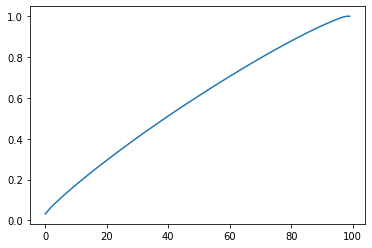

In [11]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
Reducing dimensions from 75000 to just 100 principal components:

In [12]:
pca = PCA(n_components=100)
X_new = pca.fit_transform(X)

In [13]:
X_new

array([[ 4.76745493e-02, -6.23293983e-02, -4.25553460e-02, ...,
        -1.69101561e-02,  9.02211037e-03,  2.18712500e-16],
       [-1.19976460e-01,  3.69298770e-03,  8.00396583e-02, ...,
        -1.15936047e-02,  1.80647075e-03,  2.18712500e-16],
       [-1.11650483e-01,  3.01117786e-03,  1.61045467e-01, ...,
        -3.16120605e-02,  2.92542206e-03,  2.18712500e-16],
       ...,
       [-1.14567013e-01, -9.52442282e-02, -6.29436183e-02, ...,
         4.88104695e-03,  1.14244472e-03,  2.18712500e-16],
       [-7.19711947e-02, -2.32344735e-02, -7.52821107e-02, ...,
        -1.70037956e-02, -1.56619411e-02,  2.18712500e-16],
       [-1.16582573e-01, -1.64910905e-02, -1.27576507e-01, ...,
        -7.66492053e-03, -1.86417108e-03,  2.18712500e-16]])

In [14]:
df=pd.DataFrame(X_new)

In [15]:
df

0         1         2         3         4         5         6   \
0   0.047675 -0.062329 -0.042555 -0.092908 -0.022345  0.013970  0.030829   
1  -0.119976  0.003693  0.080040  0.030302  0.153667  0.019128 -0.149642   
2  -0.111650  0.003011  0.161045  0.104767 -0.021345  0.142306 -0.142061   
3   0.406847  0.022332  0.009407  0.035710  0.060054  0.069841  0.024498   
4  -0.168548  0.127830  0.534710  0.338725 -0.276212 -0.156914  0.037625   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.343396  0.141979  0.076744  0.016435  0.188419  0.023585 -0.023331   
96  0.077736 -0.015287 -0.058129  0.036736 -0.048540 -0.019878 -0.030520   
97 -0.114567 -0.095244 -0.062944 -0.099980 -0.035260 -0.123497 -0.066486   
98 -0.071971 -0.023234 -0.075282 -0.047965  0.081719 -0.124348  0.062333   
99 -0.116583 -0.016491 -0.127577  0.042164  0.062741 -0.108217  0.046775   

          7         8         9   ...        90        91        92        93  \
0   0.109429  0.017072  0.014685  ...  0.039278 -0.024795  0.008646 -0.012310   
1   0.169038 -0.011480 -0.043589  ...  0.010833  0.012796  0.008399  0.057120   
2  -0.145304 -0.030583 -0.025145  ... -0.001728 -0.007766 -0.013747 -0.012877   
3  -0.061427  0.003095  0.048752  ...  0.117080 -0.183772  0.362542 -0.177602   
4  -0.116624  0.064780  0.063856  ...  0.066353  0.078154 -0.000373 -0.008921   
..       ...       ...       ...  ...       ...       ...       ...       ...   
95 -0.029677 -0.113412 -0.057390  ... -0.083157  0.038133 -0.022048 -0.074425   
96  0.061505 -0.057983  0.064986  ...  0.013787  0.043137 -0.037479 -0.005285   
97  0.012438 -0.022368  0.273654  ... -0.002719  0.012444  0.041593 -0.005331   
98 -0.126531 -0.083050 -0.002256  ...  0.060106  0.005542  0.030901 -0.019865   
99 -0.156618  0.026489 -0.021790  ... -0.030330 -0.000944 -0.014450  0.032516   

          94        95        96        97        98            99  
0   0.015667  0.010233 -0.029536 -0.016910  0.009022  2.187125e-16  
1   0.009571  0.030377  0.002356 -0.011594  0.001806  2.187125e-16  
2   0.027743  0.012696 -0.018882 -0.031612  0.002925  2.187125e-16  
3   0.405096 -0.251621 -0.118193 -0.003083 -0.008770  2.187125e-16  
4   0.115132  0.321642 -0.368984  0.027095 -0.007152  2.187125e-16  
..       ...       ...       ...       ...       ...           ...  
95  0.014771 -0.016248 -0.017437 -0.351400  0.005250  2.187125e-16  
96  0.013568 -0.031381 -0.008090 -0.003159  0.000109  2.187125e-16  
97  0.000520 -0.003219  0.006236  0.004881  0.001142  2.187125e-16  
98  0.014104  0.015119  0.009490 -0.017004 -0.015662  2.187125e-16  
99 -0.009625  0.005980  0.013797 -0.007665 -0.001864  2.187125e-16  

[100 rows x 100 columns]

In [ ]:
For image data:
    The dimensionality reduction is applied to each channel array(Red,Green,Blues) and later stacked again to show the results:

In [ ]:
Showing the original image:

In [16]:
import cv2

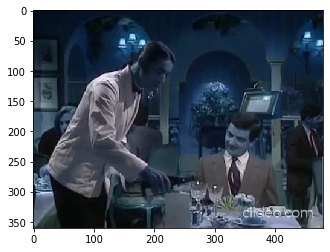

In [27]:
img=cv2.imread('frame0000.jpg')
plt.imshow(img,cmap='gray')

In [ ]:
Splitting the image into the 3 channels:

In [18]:
blue,green,red = cv2.split(img) 

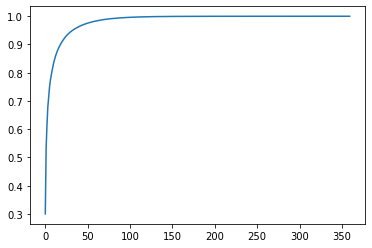

In [21]:
pca = PCA().fit(blue)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
Nearly 95% variance is achieved through 50 out of the 350 components present.

In [ ]:
Applying PCA for each channel values:

In [22]:
pca = PCA(50)
red_transformed = pca.fit_transform(red)
red_inverted = pca.inverse_transform(red_transformed)
 
#Applying to Green channel and then applying inverse transform to transformed array.
green_transformed = pca.fit_transform(green)
green_inverted = pca.inverse_transform(green_transformed)
 
#Applying to Blue channel and then applying inverse transform to transformed array.
blue_transformed = pca.fit_transform(blue)
blue_inverted = pca.inverse_transform(blue_transformed)

In [ ]:
Stacking the compressed image channel arrays to obtain the compressed image:

In [23]:
img_compressed = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)

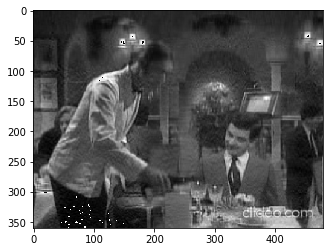

In [24]:
plt.imshow(img_compressed)

In [ ]:
Performing PCA for 100 components:

In [25]:
pca = PCA(100)
red_transformed = pca.fit_transform(red)
red_inverted = pca.inverse_transform(red_transformed)
 
#Applying to Green channel and then applying inverse transform to transformed array.
green_transformed = pca.fit_transform(green)
green_inverted = pca.inverse_transform(green_transformed)
 
#Applying to Blue channel and then applying inverse transform to transformed array.
blue_transformed = pca.fit_transform(blue)
blue_inverted = pca.inverse_transform(blue_transformed)

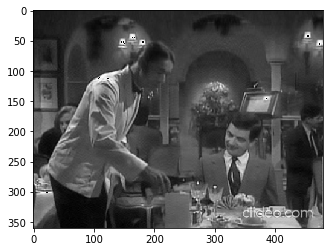

In [26]:
img_compressed = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)
plt.imshow(img_compressed)

In [ ]:
It is seen that the compressed image is found to be better using 100 PCA components instead of 50 components.

In [ ]:
For video data:

In [ ]:
Listing the frames to be appended for making the video:

In [28]:
import os
frames=os.listdir('frames')

In [29]:
frames

['frame0.jpg',
 'frame1.jpg',
 'frame10.jpg',
 'frame100.jpg',
 'frame101.jpg',
 'frame102.jpg',
 'frame103.jpg',
 'frame104.jpg',
 'frame105.jpg',
 'frame106.jpg',
 'frame107.jpg',
 'frame108.jpg',
 'frame109.jpg',
 'frame11.jpg',
 'frame110.jpg',
 'frame111.jpg',
 'frame112.jpg',
 'frame113.jpg',
 'frame114.jpg',
 'frame115.jpg',
 'frame116.jpg',
 'frame117.jpg',
 'frame118.jpg',
 'frame119.jpg',
 'frame12.jpg',
 'frame120.jpg',
 'frame121.jpg',
 'frame122.jpg',
 'frame123.jpg',
 'frame124.jpg',
 'frame125.jpg',
 'frame126.jpg',
 'frame127.jpg',
 'frame128.jpg',
 'frame129.jpg',
 'frame13.jpg',
 'frame130.jpg',
 'frame131.jpg',
 'frame132.jpg',
 'frame133.jpg',
 'frame134.jpg',
 'frame135.jpg',
 'frame136.jpg',
 'frame137.jpg',
 'frame138.jpg',
 'frame139.jpg',
 'frame14.jpg',
 'frame140.jpg',
 'frame141.jpg',
 'frame142.jpg',
 'frame143.jpg',
 'frame144.jpg',
 'frame145.jpg',
 'frame146.jpg',
 'frame147.jpg',
 'frame148.jpg',
 'frame149.jpg',
 'frame15.jpg',
 'frame150.jpg',
 'frame

In [ ]:
Applying PCA for each frame:

In [31]:

count=0

for i in range(0,len(frames)):
    img=cv2.imread("frames/frame%d.jpg" % count)
    blue,green,red = cv2.split(img) 
    pca = PCA(50)
    red_transformed = pca.fit_transform(red)
    red_inverted = pca.inverse_transform(red_transformed)
 
#Applying to Green channel and then applying inverse transform to transformed array.
    green_transformed = pca.fit_transform(green)
    green_inverted = pca.inverse_transform(green_transformed)
 
#Applying to Blue channel and then applying inverse transform to transformed array.
    blue_transformed = pca.fit_transform(blue)
    blue_inverted = pca.inverse_transform(blue_transformed)
    img_compressed = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)
    cv2.imwrite("frames1/compressedframe%d.jpg" % count, img_compressed)
    count=count+1

In [ ]:
Listing the compressed frame images:

In [34]:
compressed_frames=os.listdir('frames1')
compressed_frames

['compressedframe0.jpg',
 'compressedframe1.jpg',
 'compressedframe10.jpg',
 'compressedframe100.jpg',
 'compressedframe101.jpg',
 'compressedframe102.jpg',
 'compressedframe103.jpg',
 'compressedframe104.jpg',
 'compressedframe105.jpg',
 'compressedframe106.jpg',
 'compressedframe107.jpg',
 'compressedframe108.jpg',
 'compressedframe109.jpg',
 'compressedframe11.jpg',
 'compressedframe110.jpg',
 'compressedframe111.jpg',
 'compressedframe112.jpg',
 'compressedframe113.jpg',
 'compressedframe114.jpg',
 'compressedframe115.jpg',
 'compressedframe116.jpg',
 'compressedframe117.jpg',
 'compressedframe118.jpg',
 'compressedframe119.jpg',
 'compressedframe12.jpg',
 'compressedframe120.jpg',
 'compressedframe121.jpg',
 'compressedframe122.jpg',
 'compressedframe123.jpg',
 'compressedframe124.jpg',
 'compressedframe125.jpg',
 'compressedframe126.jpg',
 'compressedframe127.jpg',
 'compressedframe128.jpg',
 'compressedframe129.jpg',
 'compressedframe13.jpg',
 'compressedframe130.jpg',
 'compres

In [35]:
img=cv2.imread("frames1/compressedframe0.jpg")

In [37]:
import imutils
frame = imutils.resize(img, width=400)
fh=frame.shape[0]

In [38]:
fh

300

In [ ]:
Writing out video for the compressed frames:

In [39]:
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('compressed_output.avi', fourcc, 10,(400,fh),True  )
count=0
for i in range(0,len(frames)):
    img=cv2.imread("frames1/compressedframe%d.jpg" % count)
    frame = imutils.resize(img, width=400)
    out.write(frame)
    count=count+1
out.release()